<a href="https://colab.research.google.com/github/adeekodaniel/DataScienceProj/blob/main/Advance_ML_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.ensemble import RandomForestRegressor


import warnings 
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/adeekodaniel/DataScienceProj/main/adverts.csv')

In [11]:
df.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [12]:
print(df.columns)
print(df.shape)

Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'price', 'body_type', 'crossover_car_and_van',
       'fuel_type'],
      dtype='object')
(402005, 12)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [14]:
df.isna().sum().sort_values(ascending=False)

year_of_registration     33311
reg_code                 31857
standard_colour           5378
body_type                  837
fuel_type                  601
mileage                    127
public_reference             0
standard_make                0
standard_model               0
vehicle_condition            0
price                        0
crossover_car_and_van        0
dtype: int64

<Axes: >

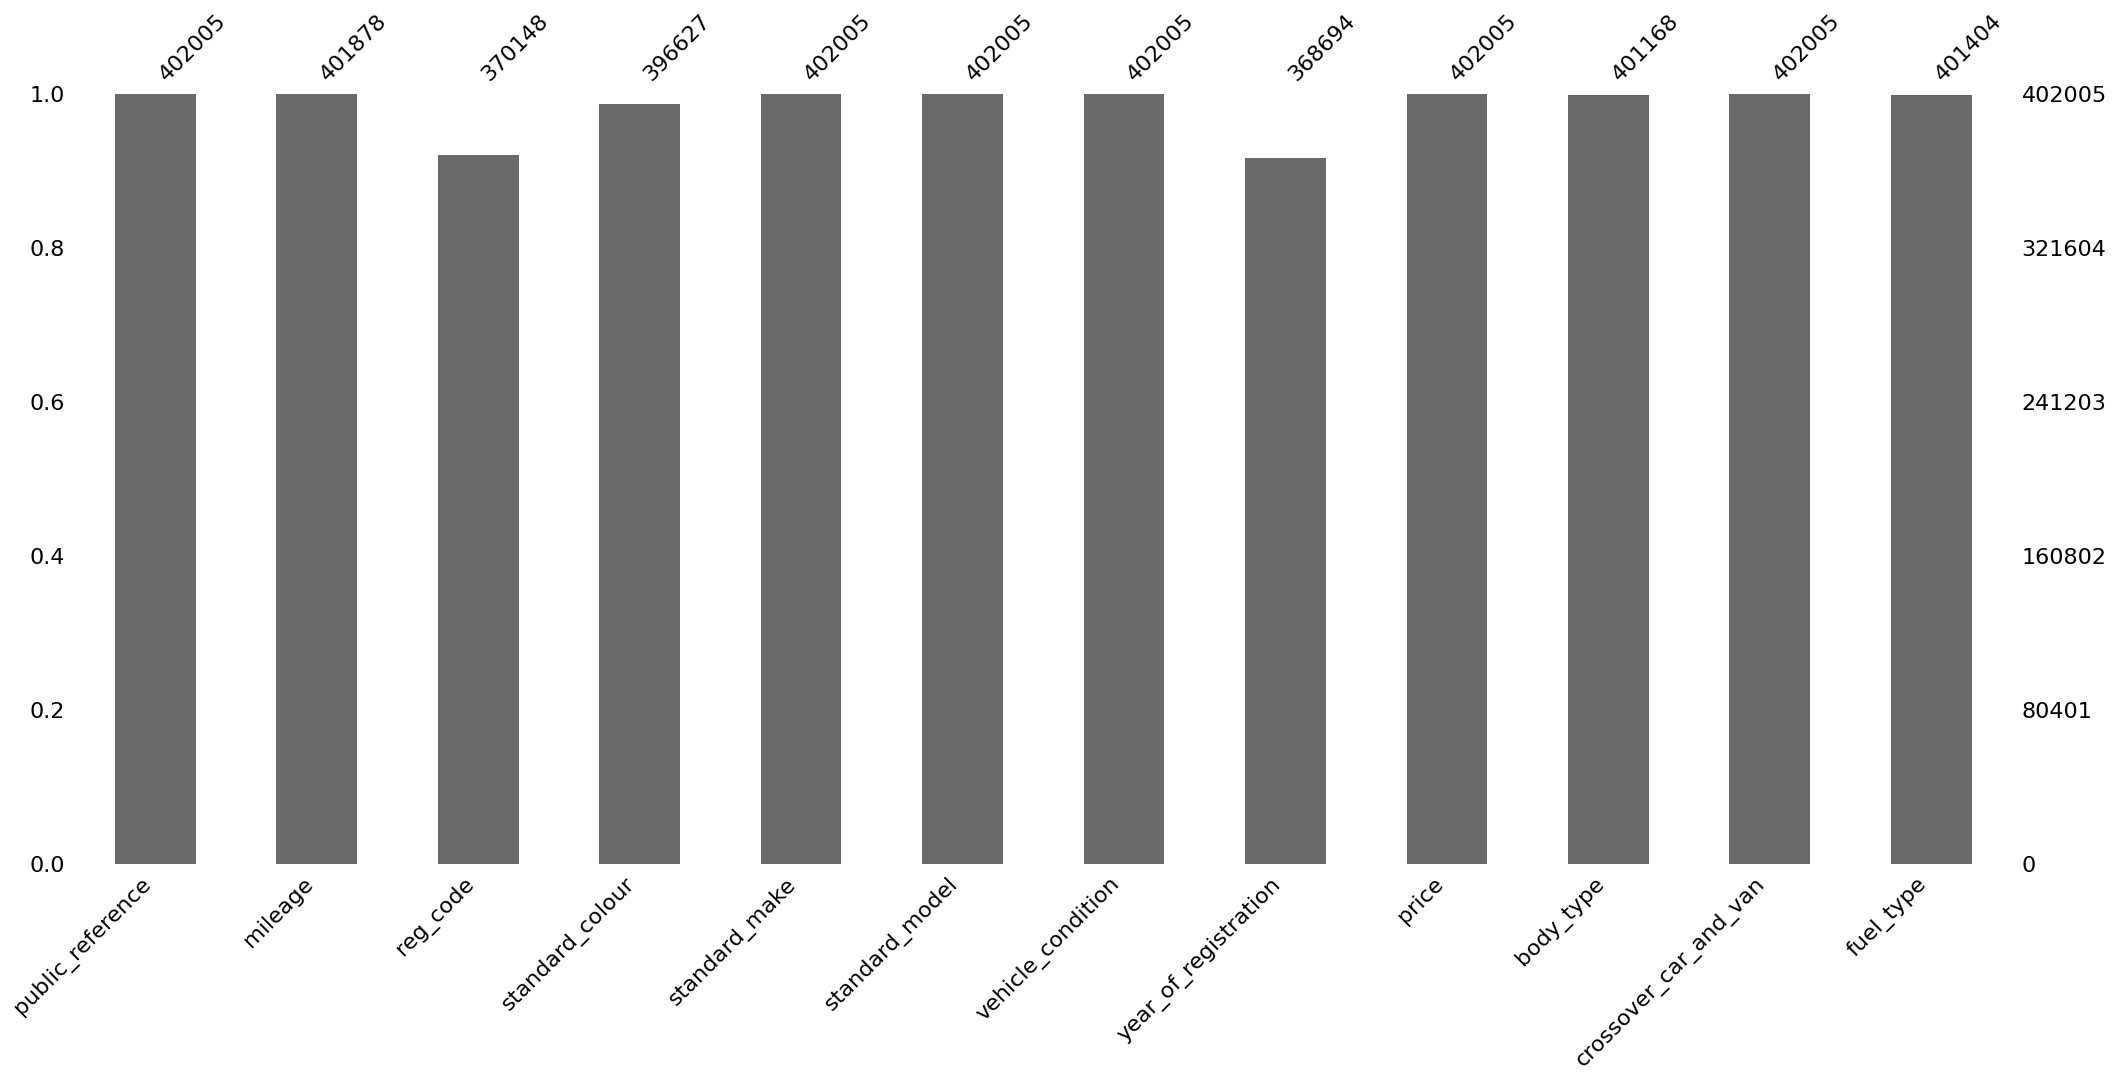

In [15]:
msno.bar(df) #visualising the missing values using a bar graph

<Axes: >

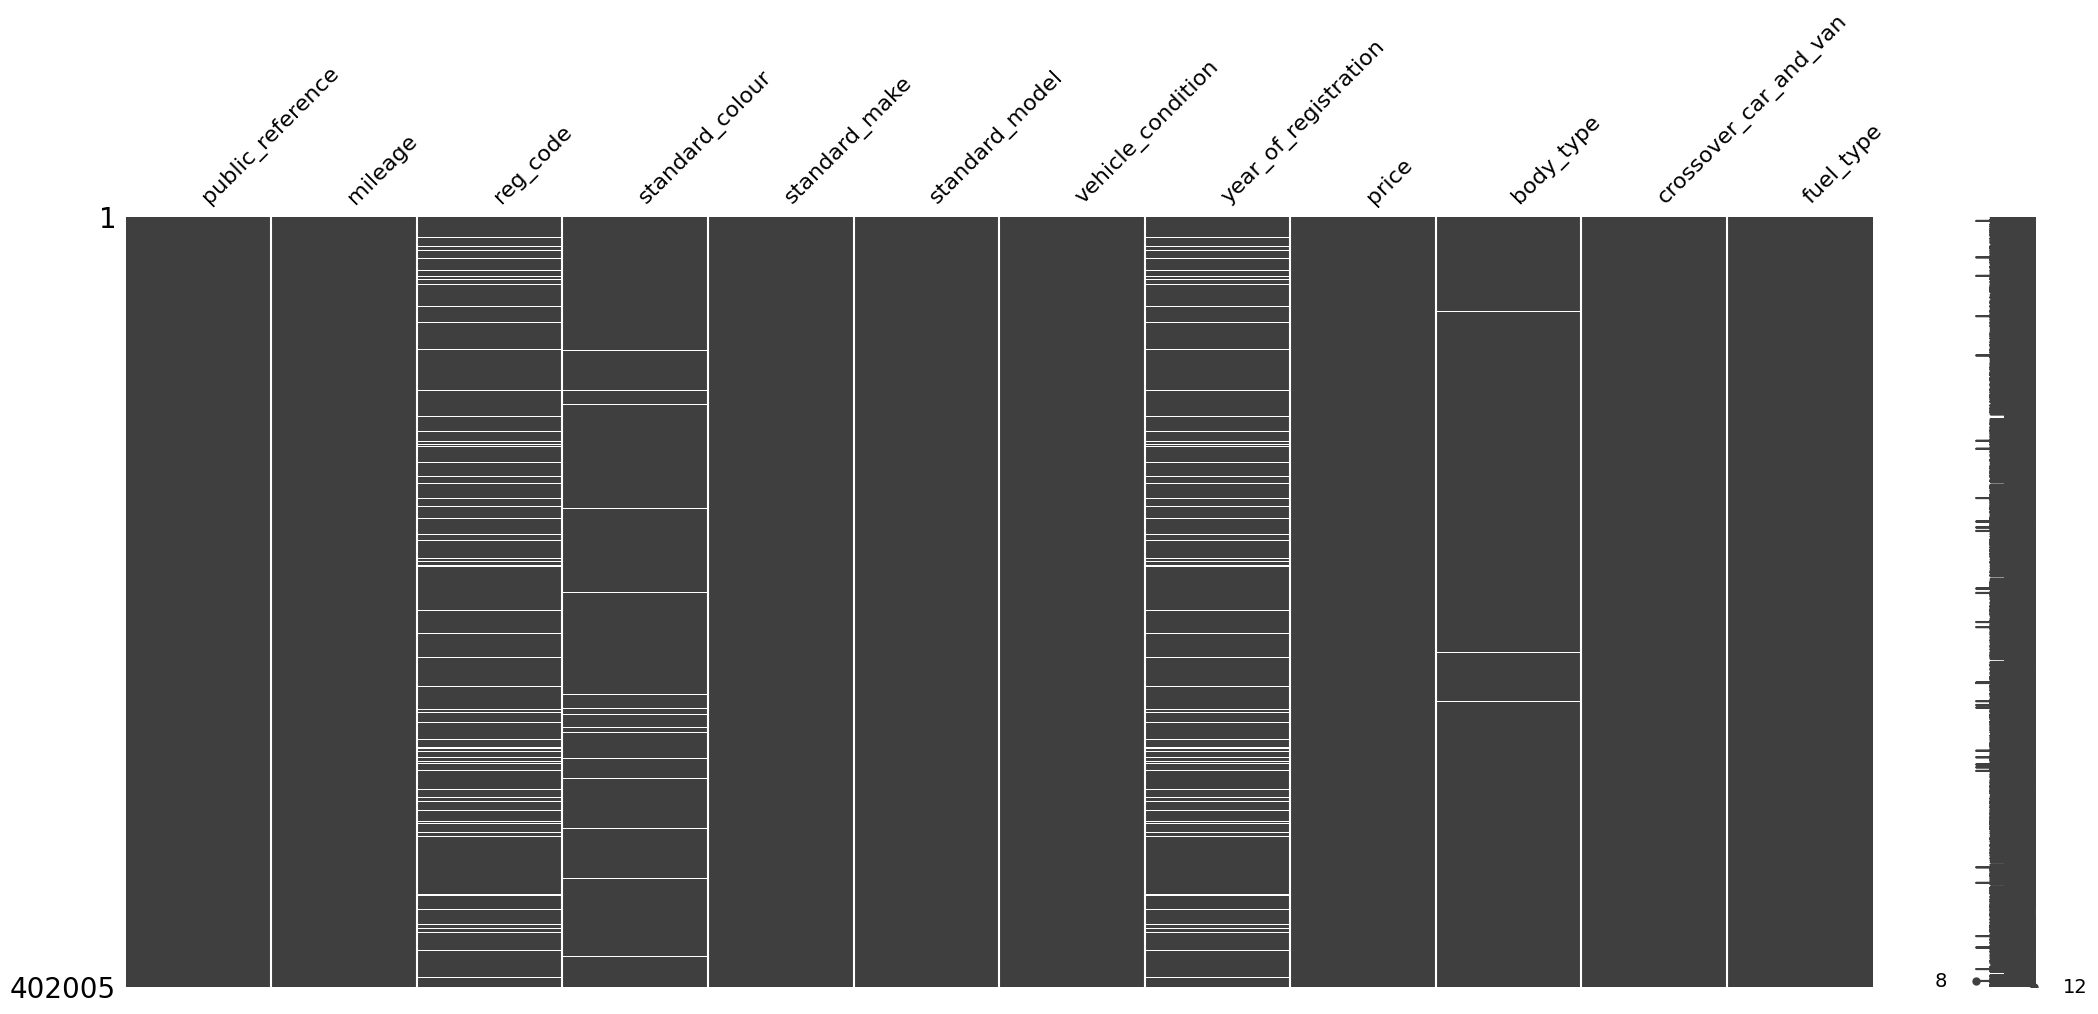

In [16]:
msno.matrix(df) 
#visaulising the distribution of missing values using a matrix

<Axes: >

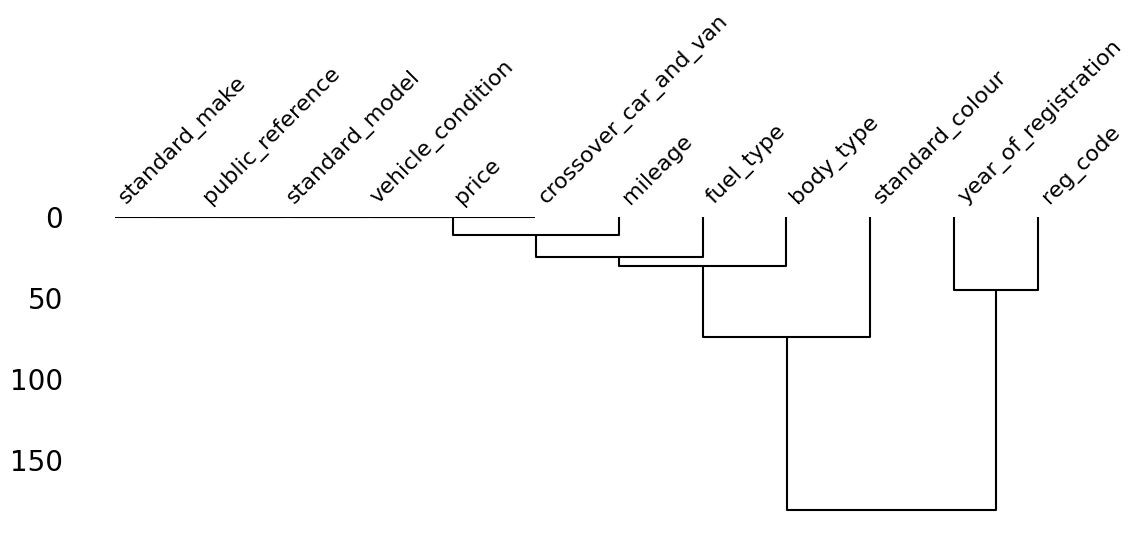

In [17]:
msno.dendrogram(df, figsize=(13, 4)) #visualising the missing values using a dendogram, this also shows highly correlated columns

<Axes: >

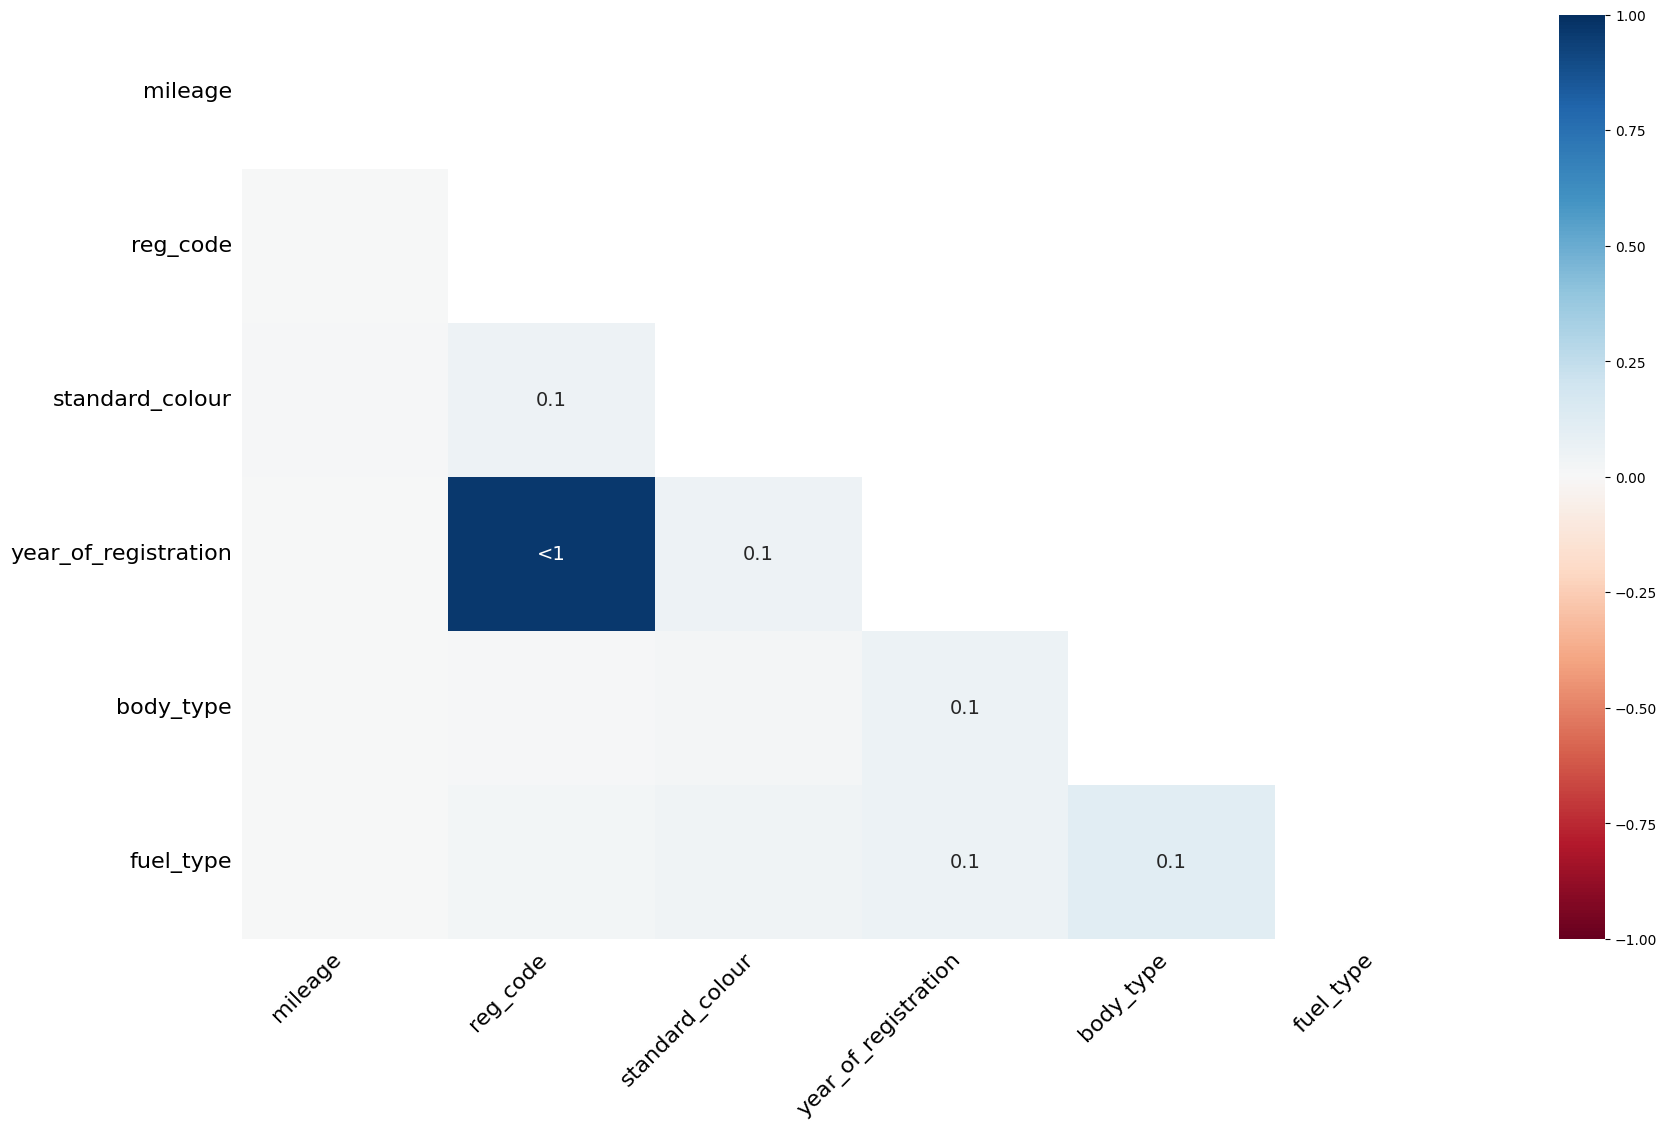

In [18]:
msno.heatmap(df)

In [19]:
missing_data = df.loc[df['reg_code'].isna() & df['year_of_registration'].isna()]
missing_data.sample(1)
#it is observed that only the new vehicle have missing year of registration and registration code, hence I will fill the missing year of registration with 2022

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
257961,202009254201729,10.0,NaN,Blue,Hyundai,Ioniq,NEW,NaN,31804,Hatchback,False,Electric


In [20]:
#filling the new cars with a year of registration 2021
df['year_of_registration'] = np.where(df['vehicle_condition'] == 'NEW', 2021, df['year_of_registration'])

In [21]:
df.isna().sum().sort_values() #checking the update of null values after filling the year of registration.

public_reference             0
standard_make                0
standard_model               0
vehicle_condition            0
price                        0
crossover_car_and_van        0
mileage                    127
fuel_type                  601
body_type                  837
year_of_registration      2062
standard_colour           5378
reg_code                 31857
dtype: int64

In [22]:
df['reg_code'].unique()

array([nan, '61', '17', '16', '64', '13', '08', '19', '60', '69', '66',
       '12', '18', '65', '09', 'B', '10', '14', '03', '67', '63', '15',
       '68', '56', '20', '70', '62', '11', '05', '59', '58', 'W', '02',
       '57', '06', '52', '53', '04', 'J', '07', '55', '51', 'X', 'D', 'S',
       'Y', '54', 'H', 'K', 'E', 'L', 'V', 'M', 'G', 'T', 'N', 'P', 'A',
       'F', 'R', 'C', '94', '85', 'CA', 'm', 'FW', '723xuu', '95', 's',
       '38', 'k', '37', 'p'], dtype=object)

In [23]:
df['year_of_registration'].unique()

array([2021., 2011., 2017., 2016., 2015., 2013., 2008., 2019., 2010.,
       2012., 2018., 2009., 1984., 2014., 2003.,   nan, 2006., 2020.,
       2005., 2000., 2002., 2007., 2004., 1991., 2001., 1986., 1998.,
       1990., 1993., 1987., 1994., 1999., 1970., 1988., 1995., 1997.,
       1969., 1992., 1989., 1996., 1976., 1983., 1980., 1973., 1962.,
       1967., 1972., 1982., 1968., 1979., 1964., 1933., 1981., 1985.,
       1978., 1971., 1974., 1966., 1977., 1961., 1965., 1007., 1957.,
       1515., 1963., 1063., 1954., 1975., 1955., 1009., 1016., 1960.,
       1956., 1959., 1909., 1934., 1958., 1010., 1950., 1008., 1018.,
        999., 1017., 1952., 1006., 1015.])

In [24]:
year_dirty = df[df['year_of_registration'].isna()]
year_dirty.sample(1)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
230872,202010225305753,93000.0,15,Black,Volkswagen,Transporter,USED,NaN,20500,Combi Van,True,Diesel


In [25]:
year_dirty['reg_code'].unique()

array(['18', '61', '66', '17', '68', nan, '70', '55', '67', '65', '69',
       '62', '20', '15', '56', '94', 'B', '14', '16', 'P', '19', '64',
       '59', '60', 'E', '85', '63', 'R', '12', '51', '13', '54', '09',
       '10', 'L', '04', '11', '08', '07', '06', '57', 'CA', '58', 'C',
       'Y', '05', 'M', 'J', 'H', 'S', '03', '723xuu', '95', '52', 'N',
       'F', 'T', 'V', '02', '53', '38', 'G', 'D', 'A', '37'], dtype=object)

In [26]:
# create a dictionary to map the reg code to their corresponding year
reg_to_year = {'18': 2018, '61': 2011, '66': 2016, '17': 2017, '68': 2019, 'nan': 2017, '70': 2020, '55': 2006, '67': 2018, '65': 2015, '69': 2019,
       '62': 2013, '20': 2020, '15': 2016, '56': 2006, '94': 2020, 'B': 1985, '14': 2014, '16': 2016, 'P': 1997, '19': 2019, '64': 2015,
       '59': 2009, '60': 2010, 'E': 1988, '85': 2020, '63': 2013, 'R': 1997, '12': 2012, '51': 2002, '13': 2014, '54': 2004, '09': 2009,
       '10': 2011, 'L': 1993, '04': 2004, '11': 2011, '08': 2008, '07': 2007, '06': 2006, '57': 2008, 'CA': '', '58': 2009, 'C': 1985,
       'Y': 2001, '05': 2005, 'M': 1995, 'J': 1992, 'H': 1990, 'S': 1999, '03': 2002, '723xuu': 2017, '95': 2020, '52': 2002, 'N': 1996,
       'F':1989, 'T': 1999, 'V': 2000, '02': 2002, '53': 2003, '38': 2018, 'G': 1989, 'D': 1987, 'A': 1983, '37': 2017
}


In [27]:
# replace 'nan' string values with actual NaN values
df['year_of_registration'] = df['year_of_registration'].replace('nan', np.nan)

# apply the dictionary to the "reg_code" column and replace any remaining missing values with np.nan
df['year_of_registration'] = df['reg_code'].map(reg_to_year).fillna(df['year_of_registration'])


In [28]:
df.isna().sum().sort_values(ascending=True)

public_reference             0
standard_make                0
standard_model               0
vehicle_condition            0
price                        0
crossover_car_and_van        0
mileage                    127
year_of_registration       321
fuel_type                  601
body_type                  837
standard_colour           5378
reg_code                 31857
dtype: int64

In [29]:
#filling missing values in different columns with the interpolate, median and forward fill method
df['mileage'] = df['mileage'].interpolate(method='linear')
df['fuel_type'] = df['fuel_type'].fillna(method='ffill')
df['body_type'] = df['body_type'].fillna(method='ffill')
df['standard_colour'] = df['standard_colour'].fillna(method='ffill')

In [30]:
df.isna().sum().sort_values(ascending=True)

public_reference             0
mileage                      0
standard_colour              0
standard_make                0
standard_model               0
vehicle_condition            0
price                        0
body_type                    0
crossover_car_and_van        0
fuel_type                    0
year_of_registration       321
reg_code                 31857
dtype: int64

In [31]:
df['year_of_registration'].unique()

array([2021.0, 2011, 2017, 2016, 2015, 2014, 2008, 2019, 2010, 2012, 2018,
       2009, 1985, 2002, 2013, 2006, 2020, 2005, 2000.0, 2003, 2004, 1992,
       2007, 1987, 1999, 2001, 1990, 1993.0, nan, 1988, 1995, 1989, 1996,
       1997, 1983, 1962.0, 1980.0, 1982.0, 1933.0, 1981.0, 1971.0, 1972.0,
       1998.0, 1961.0, 1957.0, '', 1954.0, 1955.0, 1963.0, 1960.0, 1956.0,
       1959.0, 1934.0, 1958.0, 1950.0, 1966.0, 1994.0, 1973.0, 1964.0,
       1952.0, 1991.0], dtype=object)

In [32]:
def replace_year (x,y):
  df['year_of_registration'].replace(x, y, inplace=True) 

replace_year('', 2017)


In [33]:
df['year_of_registration'].unique()

array([2021., 2011., 2017., 2016., 2015., 2014., 2008., 2019., 2010.,
       2012., 2018., 2009., 1985., 2002., 2013., 2006., 2020., 2005.,
       2000., 2003., 2004., 1992., 2007., 1987., 1999., 2001., 1990.,
       1993.,   nan, 1988., 1995., 1989., 1996., 1997., 1983., 1962.,
       1980., 1982., 1933., 1981., 1971., 1972., 1998., 1961., 1957.,
       1954., 1955., 1963., 1960., 1956., 1959., 1934., 1958., 1950.,
       1966., 1994., 1973., 1964., 1952., 1991.])

In [34]:
df['year_of_registration'] = df['year_of_registration'].fillna(df['year_of_registration'].median())

In [35]:
df['year_of_registration'] = df['year_of_registration'].astype(int)

In [36]:
df.isna().sum().sort_values(ascending=True)

public_reference             0
mileage                      0
standard_colour              0
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration         0
price                        0
body_type                    0
crossover_car_and_van        0
fuel_type                    0
reg_code                 31857
dtype: int64

In [37]:
data = df.drop(columns=['public_reference', 'reg_code'])
data.sample(1)

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
37818,866.0,Silver,Nissan,Qashqai,USED,2019,17995,SUV,False,Petrol


In [38]:
data.shape

(402005, 10)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   mileage                402005 non-null  float64
 1   standard_colour        402005 non-null  object 
 2   standard_make          402005 non-null  object 
 3   standard_model         402005 non-null  object 
 4   vehicle_condition      402005 non-null  object 
 5   year_of_registration   402005 non-null  int64  
 6   price                  402005 non-null  int64  
 7   body_type              402005 non-null  object 
 8   crossover_car_and_van  402005 non-null  bool   
 9   fuel_type              402005 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 28.0+ MB


Exploratory Data Analysis

In [40]:
duplicateRows = data[data.duplicated()]
clr_data = data.drop_duplicates()

In [41]:
clr_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393430 entries, 0 to 402004
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   mileage                393430 non-null  float64
 1   standard_colour        393430 non-null  object 
 2   standard_make          393430 non-null  object 
 3   standard_model         393430 non-null  object 
 4   vehicle_condition      393430 non-null  object 
 5   year_of_registration   393430 non-null  int64  
 6   price                  393430 non-null  int64  
 7   body_type              393430 non-null  object 
 8   crossover_car_and_van  393430 non-null  bool   
 9   fuel_type              393430 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 30.4+ MB


In [42]:
clr_data['vehicle_condition'].value_counts()

USED    368808
NEW      24622
Name: vehicle_condition, dtype: int64

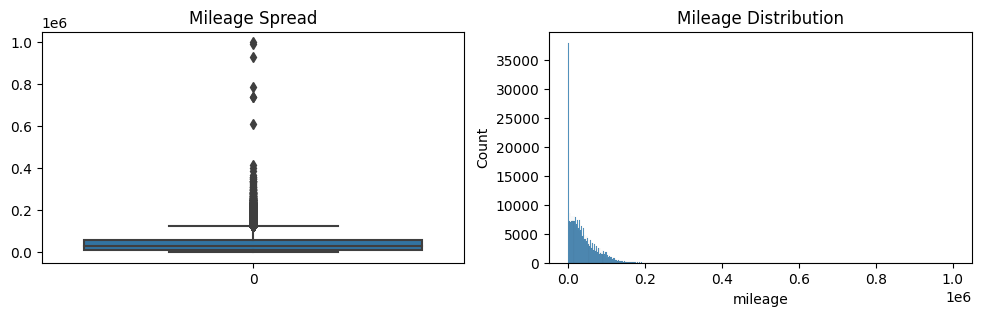

In [43]:
#plt.title('Outlier Detection in Mileage')
#sns.boxplot(x = df['mileage'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
sns.boxplot(clr_data['mileage'], ax=axes[0])
axes[0].set_title('Mileage Spread')
sns.histplot(clr_data['mileage'], ax=axes[1])
axes[1].set_title('Mileage Distribution')
plt.show()

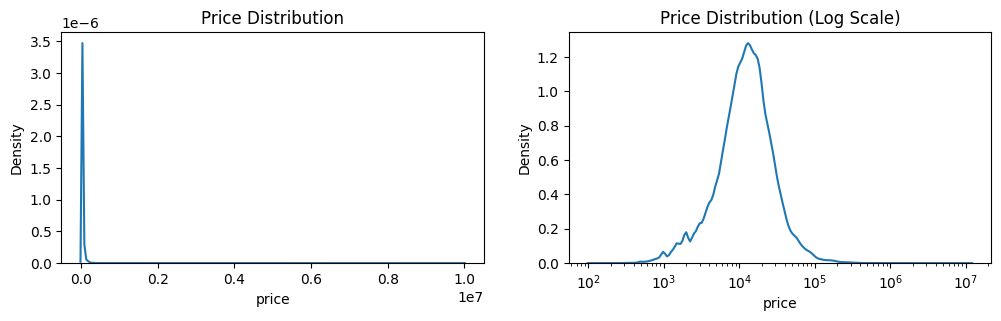

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
sns.kdeplot(clr_data['price'], ax=axes[0])
axes[0].set_title('Price Distribution')
sns.kdeplot(clr_data['price'], log_scale=True, ax=axes[1])
axes[1].set_title('Price Distribution (Log Scale)')
plt.show()


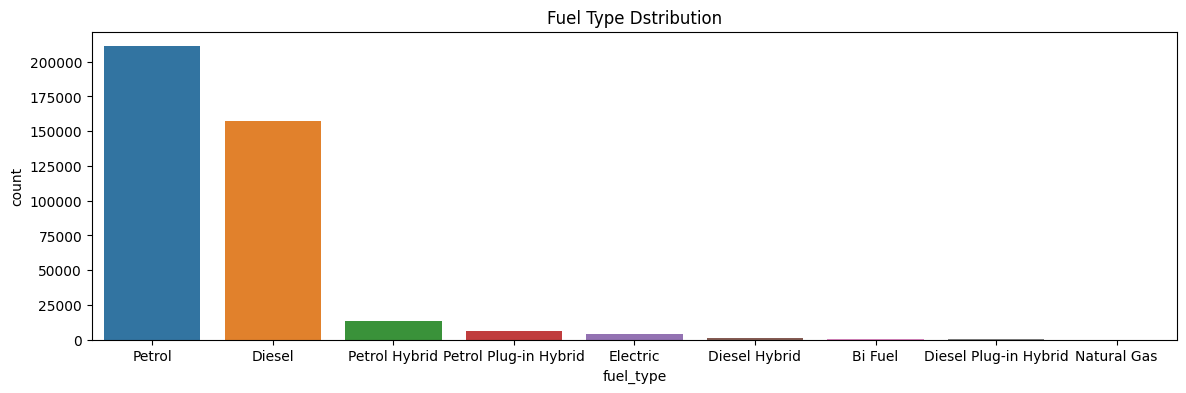

In [45]:
#Fuel Type distribution
plt.figure(figsize=(14,4))
plt.title('Fuel Type Dstribution')
sns.countplot(data = clr_data, x='fuel_type', order = data['fuel_type'].value_counts().index);

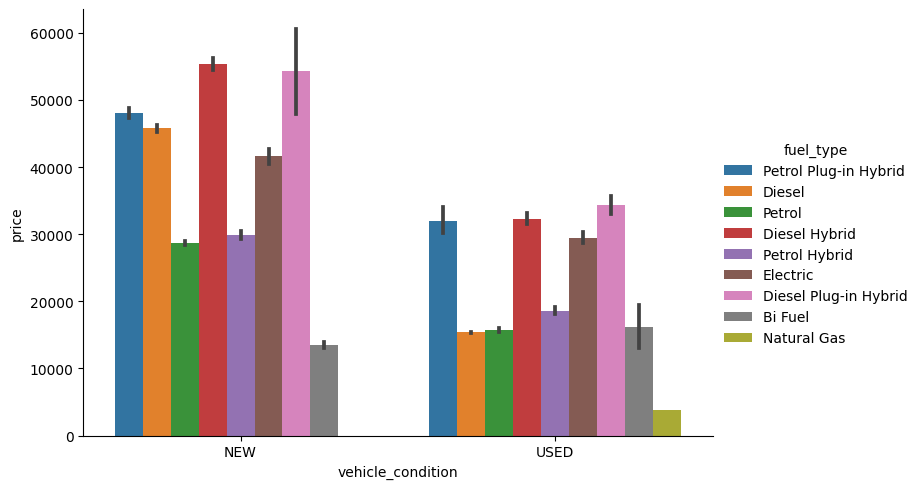

In [46]:
#Standard Make distribution
sns.catplot(data=clr_data, x="vehicle_condition", y="price", hue="fuel_type", kind="bar", height=5, aspect=1.5);

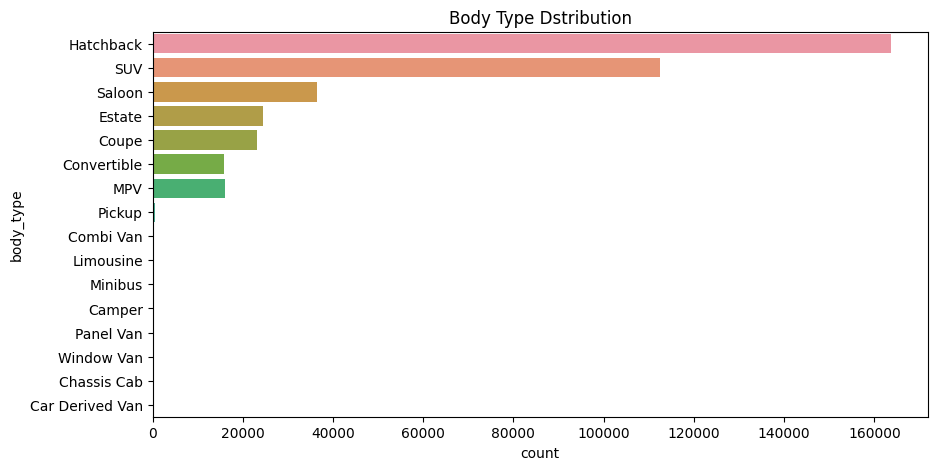

In [47]:
#Body Type distribution
plt.figure(figsize=(10,5))
plt.title('Body Type Dstribution')
sns.countplot(data = clr_data, y='body_type', order = data['body_type'].value_counts().index);

In [48]:
clr_data['standard_make'].value_counts().head()

BMW              37225
Audi             34757
Volkswagen       33596
Vauxhall         33071
Mercedes-Benz    31591
Name: standard_make, dtype: int64

In [49]:
clr_data['year_of_registration'].unique()

array([2021, 2011, 2017, 2016, 2015, 2014, 2008, 2019, 2010, 2012, 2018,
       2009, 1985, 2002, 2013, 2006, 2020, 2005, 2000, 2003, 2004, 1992,
       2007, 1987, 1999, 2001, 1990, 1993, 1988, 1995, 1989, 1996, 1997,
       1983, 1962, 1980, 1982, 1933, 1981, 1971, 1972, 1998, 1961, 1957,
       1954, 1955, 1963, 1960, 1956, 1959, 1934, 1958, 1950, 1966, 1994,
       1973, 1964, 1952, 1991])

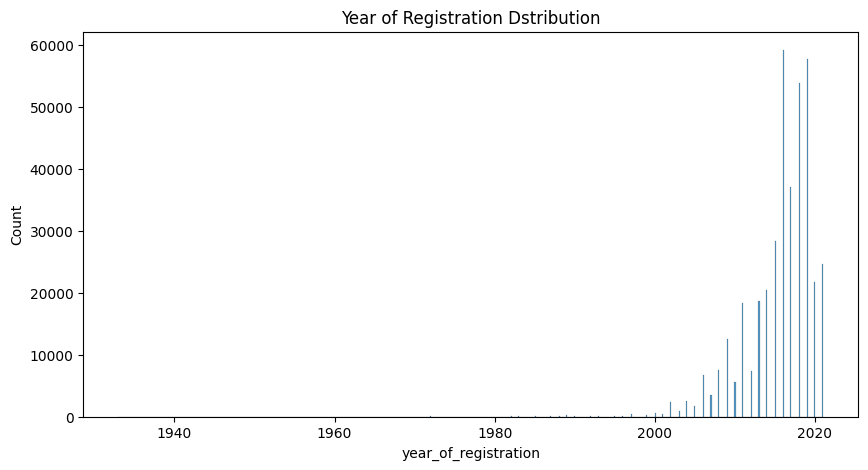

In [50]:
#Year of Registrationdistribution
plt.figure(figsize=(10,5))
plt.title('Year of Registration Dstribution')
sns.histplot(data = clr_data, x='year_of_registration');

In [51]:
#Subsetting the data for year greater than 1990
sub_data = clr_data.loc[clr_data['year_of_registration'] > 1990]

In [52]:
sub_data.shape

(392783, 10)

Dealing with outliers 

In [53]:
sub_data.describe().round()
#showing a descriptive statistics of the numerical columns in the dataset

,mileage,year_of_registration,price
count,392783.0,392783.0,392783.0
mean,38447.0,2016.0,17130.0
std,34709.0,4.0,46602.0
min,0.0,1991.0,120.0
25%,11500.0,2014.0,7450.0
50%,29360.0,2016.0,12495.0
75%,57486.0,2019.0,19990.0
max,999999.0,2021.0,9999999.0


From the descriptive statistics, It is evident of errorneous values which will cause noise in our models, as the max values of mileage and price are more than 17 times and 50 times of the 75th percentile. 

In [54]:
#dealing with outliers in the mileage column
mileage_seventy_fifth = sub_data['mileage'].quantile(0.75)
mileage_twenty_fifth = sub_data['mileage'].quantile(0.25)
mileage_iqr = mileage_seventy_fifth - mileage_twenty_fifth
# Calculate the thresholds
upper_mileage = mileage_seventy_fifth + (1.5 * mileage_iqr)
lower_mileage = mileage_twenty_fifth - (1.5 * mileage_iqr)
# Subset the data
test = sub_data[(sub_data["mileage"] > lower_mileage) & (sub_data["mileage"] < upper_mileage)]
print(test["mileage"].describe())

count    384691.000000
mean      36099.855822
std       30662.082753
min           0.000000
25%       11116.000000
50%       28560.000000
75%       55000.000000
max      126451.000000
Name: mileage, dtype: float64


In [55]:
#dealing with outliers in the price column
price_seventy_fifth = test['price'].quantile(0.75)
price_twenty_fifth = test['price'].quantile(0.25)
price_iqr = price_seventy_fifth - price_twenty_fifth
# Calculate the thresholds
upper_price = price_seventy_fifth + (1.5 * price_iqr)
lower_price = price_twenty_fifth - (1.5 * price_iqr)
# Subset the data
new_data = test[(test["price"] > lower_price) & (test["price"] < upper_price)]
print(new_data["price"].describe())

count    359478.000000
mean      13522.661298
std        8242.676666
min         120.000000
25%        7300.000000
50%       11995.000000
75%       18199.000000
max       38597.000000
Name: price, dtype: float64


In [56]:
new_data.describe().round()

,mileage,year_of_registration,price
count,359478.0,359478.0,359478.0
mean,37937.0,2016.0,13523.0
std,30656.0,4.0,8243.0
min,0.0,1992.0,120.0
25%,13200.0,2014.0,7300.0
50%,30566.0,2016.0,11995.0
75%,57359.0,2018.0,18199.0
max,126451.0,2021.0,38597.0


In [57]:
new_data.sample()

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
66799,34356.0,Red,Nissan,Qashqai,USED,2016,11900,SUV,False,Petrol


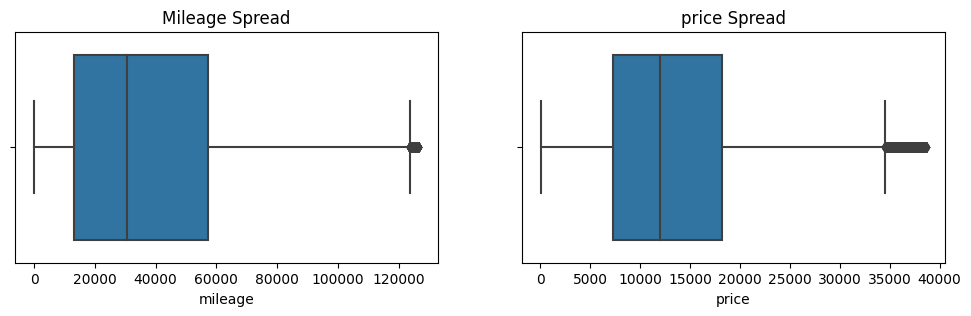

In [58]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
sns.boxplot(x= new_data['mileage'], ax=axes[0])
axes[0].set_title('Mileage Spread')
sns.boxplot(x=new_data['price'], ax=axes[1])
axes[1].set_title('price Spread')
plt.show()

<Axes: xlabel='price', ylabel='fuel_type'>

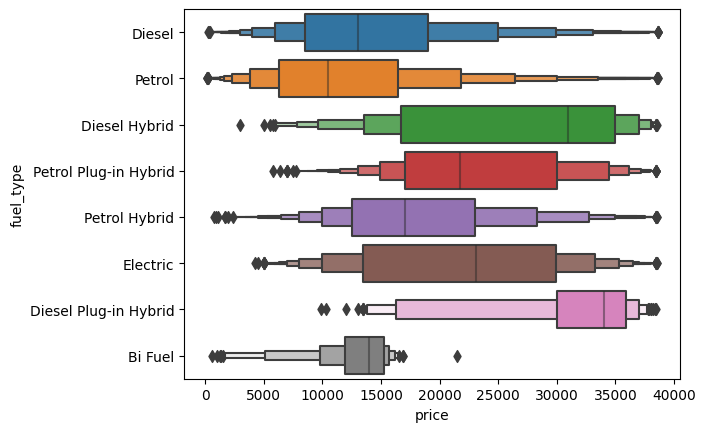

In [59]:
sns.boxenplot(data=new_data, x="price", y="fuel_type")

<Axes: >

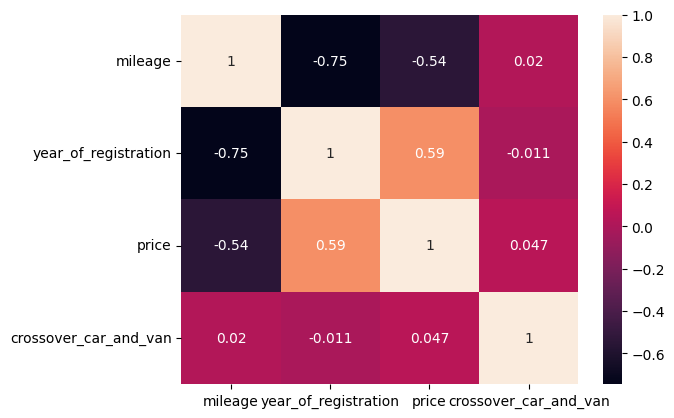

In [60]:
sns.heatmap(new_data.corr(), annot=True)

Sampling the dataset

In [61]:
# Set the random seed for reproducibility
random_seed = 42

# Sample 5% of the rows from the dataframe
clean_df = new_data.sample(frac=0.05, random_state=random_seed)

In [62]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17974 entries, 388381 to 4180
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   mileage                17974 non-null  float64
 1   standard_colour        17974 non-null  object 
 2   standard_make          17974 non-null  object 
 3   standard_model         17974 non-null  object 
 4   vehicle_condition      17974 non-null  object 
 5   year_of_registration   17974 non-null  int64  
 6   price                  17974 non-null  int64  
 7   body_type              17974 non-null  object 
 8   crossover_car_and_van  17974 non-null  bool   
 9   fuel_type              17974 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 1.4+ MB


In [63]:
clean_df['standard_make'].value_counts()
#the popularity of top models like BMW, Volkswagen, Vauxhall, Audi, Mercedes-Benz, Nissan will have more influence on the prediction of the model, 
#than  unpopular brand like Austin, Perodua, Caterham

BMW               1666
Volkswagen        1657
Vauxhall          1598
Audi              1581
Mercedes-Benz     1389
Nissan             945
Toyota             835
Peugeot            744
Kia                639
SKODA              596
Renault            558
Hyundai            548
MINI               539
Citroen            503
SEAT               463
Land Rover         438
Fiat               417
Volvo              408
Honda              404
Mazda              345
Jaguar             325
Suzuki             261
Mitsubishi         162
Dacia              161
Lexus              128
Porsche             95
Alfa Romeo          69
DS AUTOMOBILES      67
MG                  66
Smart               65
Jeep                63
Subaru              53
Abarth              44
SsangYong           26
Chevrolet           21
Saab                15
Bentley             13
Infiniti            12
Aston Martin         9
Chrysler             9
Maserati             8
Dodge                4
Rover                4
Isuzu      

<Axes: xlabel='price', ylabel='fuel_type'>

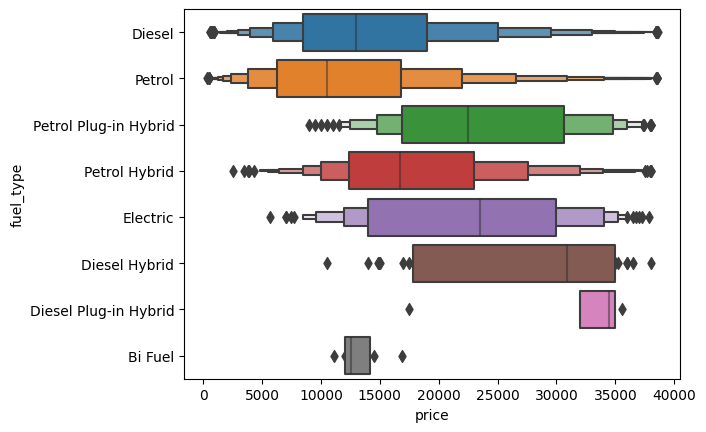

In [64]:
sns.boxenplot(data=clean_df, x="price", y="fuel_type")

In [65]:
clean_df['body_type'].value_counts()

Hatchback      8070
SUV            4792
Saloon         1609
Estate         1137
Coupe           875
MPV             773
Convertible     661
Pickup           25
Combi Van        13
Panel Van         6
Minibus           6
Camper            3
Limousine         3
Window Van        1
Name: body_type, dtype: int64

In [66]:
clean_df['vehicle_condition'].value_counts()

USED    17089
NEW       885
Name: vehicle_condition, dtype: int64

<Axes: xlabel='price', ylabel='vehicle_condition'>

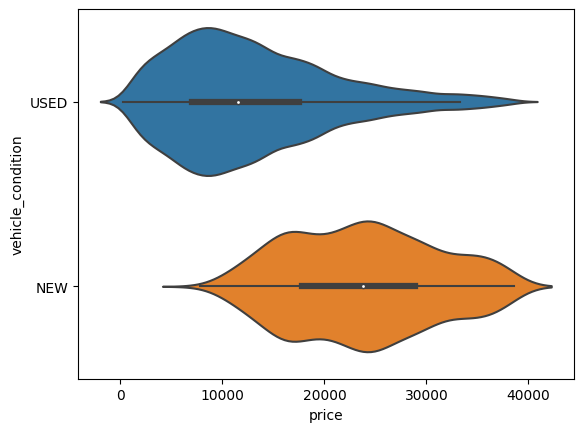

In [67]:
sns.violinplot(data=clean_df, x="price", y="vehicle_condition")

In [68]:
clean_df['year_of_registration'].value_counts()

2016    2888
2019    2631
2018    2606
2017    1831
2015    1260
2014     993
2013     901
2021     885
2020     847
2011     829
2009     564
2012     344
2008     325
2006     276
2010     254
2007     155
2002      95
2004      91
2005      86
2003      38
2000      25
1997      13
2001      10
1999       7
1995       6
1992       5
1993       4
1996       4
1998       1
Name: year_of_registration, dtype: int64

In [69]:
clean_df.corr()['price'] # checking the correlation of the numerical columns with the target column

mileage                 -0.553923
year_of_registration     0.593093
price                    1.000000
crossover_car_and_van    0.028352
Name: price, dtype: float64

In [70]:
clean_df.sample(1)

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
285306,30482.0,Black,Fiat,Tipo,USED,2018,6475,Hatchback,False,Diesel


# **Feature Engineering**

In [71]:
#creatung an age of registration columns subtraction year of registration from current year 
clean_df['age'] = 2023 - clean_df['year_of_registration']

In [72]:
#Miles per year: This can be calculated by dividing the mileage by the age of the vehicle.
clean_df['miles_per_year'] = clean_df['mileage'] / clean_df['age']

In [73]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17974 entries, 388381 to 4180
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   mileage                17974 non-null  float64
 1   standard_colour        17974 non-null  object 
 2   standard_make          17974 non-null  object 
 3   standard_model         17974 non-null  object 
 4   vehicle_condition      17974 non-null  object 
 5   year_of_registration   17974 non-null  int64  
 6   price                  17974 non-null  int64  
 7   body_type              17974 non-null  object 
 8   crossover_car_and_van  17974 non-null  bool   
 9   fuel_type              17974 non-null  object 
 10  age                    17974 non-null  int64  
 11  miles_per_year         17974 non-null  float64
dtypes: bool(1), float64(2), int64(3), object(6)
memory usage: 1.7+ MB


In [74]:
clean_df.head(2)

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,age,miles_per_year
388381,59000.0,White,MINI,Countryman,USED,2013,8900,SUV,False,Diesel,10,5900.000000
170851,9512.0,Black,BMW,2 Series Gran Coupe,USED,2020,31990,Saloon,False,Petrol,3,3170.666667


Feature Selection and Dimensionality Reduction

In [75]:
clean_df.corr()['price'] # checking the correlation of the numerical columns with the target column

mileage                 -0.553923
year_of_registration     0.593093
price                    1.000000
crossover_car_and_van    0.028352
age                     -0.593093
miles_per_year          -0.368278
Name: price, dtype: float64

<Axes: >

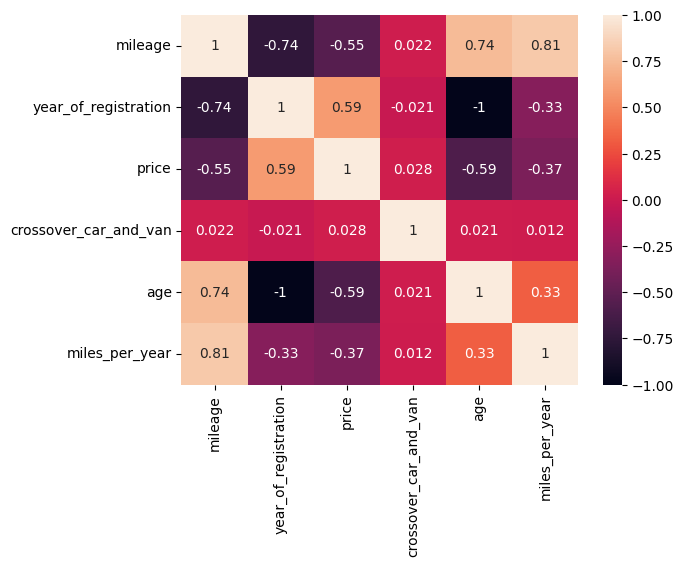

In [76]:
sns.heatmap(clean_df.corr(), annot=True)

The correlation matrix shows the correlation coefficients between all pairs of variables in the dataframe. We can see that the mileage and year_of_registration variables are highly negatively correlated with a coefficient of -0.74. This means that as the mileage increases, the year of registration tends to decrease, and vice versa. 

Additionally, The crossover_car_and_van has a very weak correlation, I will be dropping it also.

In [77]:
reduced_df = clean_df.drop(columns=['crossover_car_and_van', 'age', 'standard_colour'])

Splitting of data and target

In [78]:
X, y = reduced_df.drop(columns='price'), clean_df['price']

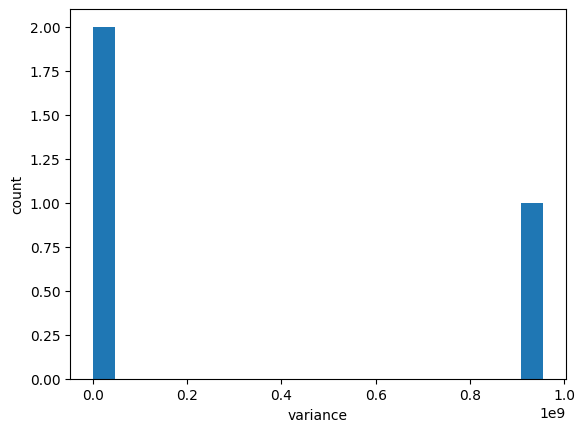

mileage                 9.555055e+08
year_of_registration    1.559405e+01
miles_per_year          9.314530e+06
dtype: float64


In [79]:
variances = np.var(X, axis=0)

plt.hist(variances, bins=20)
plt.xlabel('variance')
plt.ylabel('count')
plt.show()

print(variances)

In [80]:
#splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23)
X_train.shape, X_test.shape

((13480, 8), (4494, 8))

Polynomial and Interaction Features

In [81]:
numerical_features = X_train.select_dtypes(exclude='object').columns.tolist()
numerical_transformer = Pipeline(
    steps=[
        ('simple_imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()), 
        ('poly_int', PolynomialFeatures(degree=2, include_bias=False))
    ]
).set_output(transform='pandas')

print(numerical_features)
numerical_transformer

['mileage', 'year_of_registration', 'miles_per_year']


Pipeline(steps=[('simple_imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('poly_int', PolynomialFeatures(include_bias=False))])

In [82]:
numerical_transformer.fit_transform(X_train[numerical_features]).sample(1)

,mileage,year_of_registration,miles_per_year,mileage^2,mileage year_of_registration,mileage miles_per_year,year_of_registration^2,year_of_registration miles_per_year,miles_per_year^2
345897,-0.732496,0.089941,-0.802983,0.53655,-0.065882,0.588182,0.008089,-0.072221,0.644782


In [83]:
categorical_features = X_train.select_dtypes(include='object').columns.tolist()
categorical_transformer = Pipeline(
    steps=[
        ('simple_imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='if_binary'))
    ]
).set_output(transform='pandas')

print(categorical_features)
categorical_transformer

['standard_make', 'standard_model', 'vehicle_condition', 'body_type', 'fuel_type']


Pipeline(steps=[('simple_imputer', SimpleImputer(strategy='most_frequent')),
                ('ohe',
                 OneHotEncoder(drop='if_binary', handle_unknown='ignore',
                               sparse_output=False))])

In [84]:
categorical_transformer.fit_transform(X_train[categorical_features]).sample(1)

,standard_make_Abarth,standard_make_Alfa Romeo,standard_make_Aston Martin,standard_make_Audi,standard_make_Austin,standard_make_BMW,standard_make_Bentley,standard_make_CUPRA,standard_make_Chevrolet,standard_make_Chrysler,...,body_type_Saloon,body_type_Window Van,fuel_type_Bi Fuel,fuel_type_Diesel,fuel_type_Diesel Hybrid,fuel_type_Diesel Plug-in Hybrid,fuel_type_Electric,fuel_type_Petrol,fuel_type_Petrol Hybrid,fuel_type_Petrol Plug-in Hybrid
334324,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [85]:
preprocessor = ColumnTransformer(
    transformers = [
        ('num', numerical_transformer, numerical_features), 
        ('cat', categorical_transformer, categorical_features)
    ], 
    remainder ='passthrough', 
    verbose_feature_names_out=False
).set_output(transform='pandas')

In [86]:
preprocessor.fit_transform(X_train).head()

,mileage,year_of_registration,miles_per_year,mileage^2,mileage year_of_registration,mileage miles_per_year,year_of_registration^2,year_of_registration miles_per_year,miles_per_year^2,standard_make_Abarth,...,body_type_Saloon,body_type_Window Van,fuel_type_Bi Fuel,fuel_type_Diesel,fuel_type_Diesel Hybrid,fuel_type_Diesel Plug-in Hybrid,fuel_type_Electric,fuel_type_Petrol,fuel_type_Petrol Hybrid,fuel_type_Petrol Plug-in Hybrid
21986,-1.138870,0.849914,-1.296256,1.297024,-0.967941,1.476267,0.722354,-1.101706,1.680281,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
63361,-0.222319,0.596590,0.526504,0.049426,-0.132633,-0.117052,0.355919,0.314107,0.277207,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
236128,-0.229446,0.089941,-0.070364,0.052645,-0.020637,0.016145,0.008089,-0.006329,0.004951,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
289433,2.447037,-1.176679,1.596814,5.987990,-2.879378,3.907462,1.384575,-1.878938,2.549814,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
141257,-1.228935,1.103238,-1.525662,1.510281,-1.355808,1.874939,1.217134,-1.683168,2.327643,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#**Feature Selection and Dimensionality Reduction**

I will be using Variance Threshold and SelectKbest (f-regression) to select features from the dataset.

**Variance Threshold**


In [87]:
#It removes all features whose variance doesn’t meet some threshold, this is like removing features of same values
from sklearn.feature_selection import VarianceThreshold

selector = Pipeline([
    ('preprocessor', preprocessor), 
    ('variance_selector', VarianceThreshold(threshold=0.001))
]).set_output(transform='pandas')

selector.fit(X_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('poly_int',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['mileage',
                                                   'year_of_registration',
                                                   'miles_per_year']),
                                                 ('cat',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['standard_make',
                                                   'standard_model',
                                                   'vehicle_condition',
                                                   'body_type', 'fuel_type'])],
                                   verbose_feature_names_out=False)),
                ('variance_selector', VarianceThreshold(threshold=0.001))])

In [88]:
sum(selector.named_steps['variance_selector'].get_support()) #sum of features seen during fitting of the data

257

**Univariate Feature Selection: SelectKBest using f-regression**


In [89]:
#setting up the selectkbest technique using f-regression
from sklearn.feature_selection import SelectKBest, f_regression

f_reg_sel = Pipeline( 
    steps=[
        ('preprocessor', preprocessor), 
        ('feat_sel', SelectKBest(f_regression, k=10)), 
    ]
).set_output(transform='pandas')

f_reg_sel.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('poly_int',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['mileage',
                                                   'year_of_registration',
                                                   'miles_per_year']),
                                                 ('cat',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['standard_make',
                                                   'standard_model',
                                                   'vehicle_condition',
                                                   'body_type', 'fuel_type'])],
                                   verbose_feature_names_out=False)),
                ('feat_sel',
                 SelectKBest(score_func=<function f_regression at 0x7fcaebe73640>))])

In [90]:
f_reg_sel.named_steps['feat_sel'].get_feature_names_out() #diplaying the features selected by the SKbest technique

array(['mileage', 'year_of_registration', 'miles_per_year', 'mileage^2',
       'year_of_registration miles_per_year', 'standard_make_Vauxhall',
       'vehicle_condition_USED', 'body_type_Hatchback', 'body_type_SUV',
       'fuel_type_Petrol'], dtype=object)

**Dimensionality Reduction with PCA**

In [91]:
from sklearn.decomposition import PCA

In [92]:
#seeting up the PCA and fitting on the training data
pca_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('reducer', PCA(n_components=5)),
]).set_output(transform='pandas')

pca_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('poly_int',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['mileage',
                                                   'year_of_registration',
                                                   'miles_per_year']),
                                                 ('cat',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['standard_make',
                                                   'standard_model',
                                                   'vehicle_condition',
                                                   'body_type', 'fuel_type'])],
                                   verbose_feature_names_out=False)),
                ('reducer', PCA(n_components=5))])

In [93]:
pca_pipe.named_steps['reducer'].explained_variance_ratio_ #displaying the explained ratio coefficient of the 5 components 

array([0.34889345, 0.27876057, 0.10102797, 0.08292869, 0.02731138])

In [94]:
print(pca_pipe.named_steps['reducer'].explained_variance_ratio_.sum()) # the 5 components selected by PCA explains only 80% of the variance in the dataset

0.8389220599619779


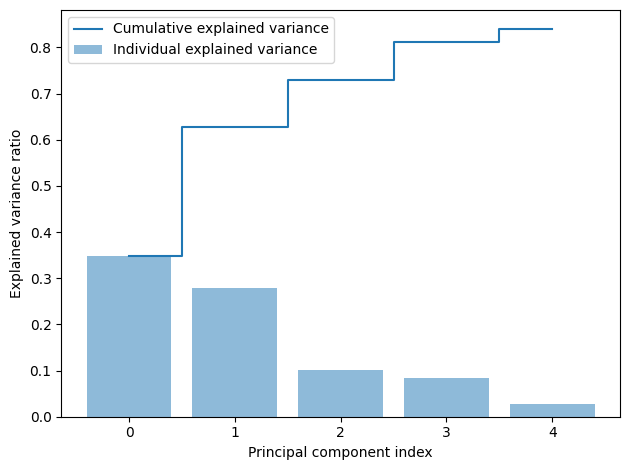

In [95]:
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
exp_var_pca = pca_pipe.named_steps['reducer'].explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# **Model Building**

For this analysis, I will be using the following models - 

1.   Linear Model - ElasticNet
2.   Random Forest - Random Forest Regressor
3.   Boosted Tree - Hist Gradient Boosting Regressor
4.   Stacker Ensemble - Stacking Regressor

## **1. Linear Model - ElasticNet**

In [96]:
#building the ElasticNet model
from sklearn.linear_model import ElasticNet

linear_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
linear_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor), 
        #('variance_selector', VarianceThreshold(threshold=0.01)), 
        #('feat_sel', SelectKBest(f_regression, k=10)), 
        #('reducer', PCA(n_components=5)),
        ('lr_model', linear_model)
    ]
).set_output(transform='pandas')

In [97]:
#fitting the model on the train and test data
linear_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('poly_int',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['mileage',
                                                   'year_of_registration',
                                                   'miles_per_year']),
                                                 ('cat',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['standard_make',
                                                   'standard_model',
                                                   'vehicle_condition',
                                                   'body_type', 'fuel_type'])],
                                   verbose_feature_names_out=False)),
                ('lr_model', ElasticNet(alpha=0.1))])

In [98]:
linear_pipe.feature_names_in_ #display the features fitted into the model

array(['mileage', 'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'body_type', 'fuel_type', 'miles_per_year'],
      dtype=object)

In [99]:
linear_mask = linear_pipe.named_steps['lr_model'].coef_ != 0 #masking of coefficient that are not equal to zero

In [100]:
sum(linear_mask) # the numbers of coefficient that ElasticNet used in it prediction

606

**a. Evaluation of Elastic Net (Linear) Model**

In [101]:
linear_pipe.score(X_test, y_test) #cehcking the score of the model

0.7034248550349937

In [102]:
from sklearn.metrics import mean_squared_error
from functools import partial 
rmse = partial(mean_squared_error, squared=False)

In [103]:
rmse(y_test, linear_pipe.predict(X_test) ) #checking the rmse score of the model

4537.272521297706

In [104]:
y_test.describe() #doing a quick summary statistics on the test data

count     4494.000000
mean     13749.657321
std       8332.509434
min        489.000000
25%       7495.000000
50%      12245.000000
75%      18495.000000
max      38559.000000
Name: price, dtype: float64

In [105]:
#displaying the top 10 features in the prediction

def get_feat_coef_lm(linear_pipe): 
  return pd.DataFrame ( 
      zip(
          linear_pipe['lr_model'].coef_,
          linear_pipe['lr_model'].feature_names_in_
      ), columns = ['coef', 'feature']
  ).sort_values(by='coef', key=np.abs, ascending= False)

get_feat_coef_lm(linear_pipe).head(10) 

,coef,feature
1,3663.646572,year_of_registration
610,-3213.845405,body_type_Hatchback
32,2558.760498,standard_make_Land Rover
14,2348.251568,standard_make_BMW
12,2329.357190,standard_make_Audi
39,2288.787537,standard_make_Mercedes-Benz
0,-2037.929558,mileage
624,-1909.099313,fuel_type_Petrol
59,-1887.626439,standard_make_Vauxhall
42,-1417.359691,standard_make_Peugeot


**b. Hyperparameter Tuning - with GridSearch CV: Linear Model**

In [ ]:
#setting up parameters
linear_params = {
    'lr_model__alpha': [0.1, 1, 10],
    'lr_model__l1_ratio': [0.1, 0.5, 0.9]
}

In [ ]:
#setting the parameters for the linear grid search
linear_grid = GridSearchCV(linear_pipe, 
                    param_grid = linear_params, 
                    cv=5, 
                    scoring='neg_mean_squared_error')

In [ ]:
linear_grid.fit(X_train, y_train) #fitting the model on the training data

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('simple_imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler()),
                                                                                         ('poly_int',
                                                                                          PolynomialFeatures(include_bias=False))]),
                                                                         ['mileage',
                                                                          'year_of_registration',
                                                                          'miles_per_year']),
                                                                        ('cat',
                                                                         Pipeline(steps=[(...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='if_binary',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['standard_make',
                                                                          'standard_model',
                                                                          'vehicle_condition',
                                                                          'body_type',
                                                                          'fuel_type'])],
                                                          verbose_feature_names_out=False)),
                                       ('lr_model', ElasticNet(alpha=0.1))]),
             param_grid={'lr_model__alpha': [0.1, 1, 10],
                         'lr_model__l1_ratio': [0.1, 0.5, 0.9]},
             scoring='neg_mean_squared_error')

In [ ]:
# Get the best hyperparameters and score
print(f'Best Hyperparameters: {linear_grid.best_params_}')
print(f'Best Score: {linear_grid.best_score_}')

Best Hyperparameters: {'lr_model__alpha': 0.1, 'lr_model__l1_ratio': 0.9}
Best Score: -15004834.272209307


In [ ]:
linear_grid.score(X_test, y_test) #checking the score of the linear grid search model

-15411256.01547886

In [ ]:
# make predictions on test data using the best model
y_pred = linear_grid.predict(X_test)

# calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 15411256.01547886
R-squared: 0.7779846223202012


In [ ]:
#converting the grid search results to a dataframe
results = pd.DataFrame(linear_grid.cv_results_)
results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_lr_model__alpha', 'param_lr_model__l1_ratio', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [ ]:
#displaying the results of the hyperparameter tunning
results[['param_lr_model__alpha',
       'param_lr_model__l1_ratio', 'mean_test_score', 'std_test_score',
       'rank_test_score']]. sort_values('rank_test_score')

,param_lr_model__alpha,param_lr_model__l1_ratio,mean_test_score,std_test_score,rank_test_score
2,0.1,0.9,-1.500483e+07,9.022603e+05,1
1,0.1,0.5,-2.012196e+07,1.113936e+06,2
0,0.1,0.1,-2.242403e+07,1.165496e+06,3
5,1,0.9,-2.292798e+07,1.174389e+06,4
4,1,0.5,-3.162630e+07,1.153641e+06,5
3,1,0.1,-3.616613e+07,1.062156e+06,6
8,10,0.9,-3.724497e+07,1.041123e+06,7
7,10,0.5,-5.194830e+07,6.745869e+05,8
6,10,0.1,-5.663491e+07,6.332421e+05,9


## **2. Random Forest Regressor**

In [106]:
#building the random forest regressor model
regressor_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor), 
        #('variance_selector', VarianceThreshold(threshold=0.01)), 
        #('feat_sel', SelectKBest(f_regression, k=10)), 
        #('reducer', PCA(n_components=5)),
        ('regressor_model', RandomForestRegressor())
    ]
).set_output(transform='pandas')

In [107]:
regressor_pipe.fit(X_train, y_train) #fitting the model on the train data

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('poly_int',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['mileage',
                                                   'year_of_registration',
                                                   'miles_per_year']),
                                                 ('cat',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['standard_make',
                                                   'standard_model',
                                                   'vehicle_condition',
                                                   'body_type', 'fuel_type'])],
                                   verbose_feature_names_out=False)),
                ('regressor_model', RandomForestRegressor())])

**b. Evaluating Random Forest Regressor Model**

In [108]:
regressor_pipe.score(X_test, y_test) #checking the score of the regressor pipeline

0.8674711633196148

In [109]:
rmse(y_test, regressor_pipe.predict(X_test)) #checking the rmse score of the regressor model

3033.0717371939145

In [130]:
#getting the coefficient of features in the model
def get_feat_coef_rgr(regressor_pipe):
    return pd.DataFrame(
        zip(
            regressor_pipe['preprocessor'].transformers_[0][1].get_feature_names_out(),
            regressor_pipe['regressor_model'].feature_importances_,
            
        ),
        columns=[ 'name', 'feature importance']
    ).sort_values(by='feature importance', key=np.abs, ascending=False)

get_feat_coef_rgr(regressor_pipe).head(10)


,name,feature importance
1,year_of_registration,0.300687
4,mileage year_of_registration,0.135195
6,year_of_registration^2,0.028327
0,mileage,0.013407
7,year_of_registration miles_per_year,0.010939
5,mileage miles_per_year,0.008859
3,mileage^2,0.008492
8,miles_per_year^2,0.008467
2,miles_per_year,0.007309


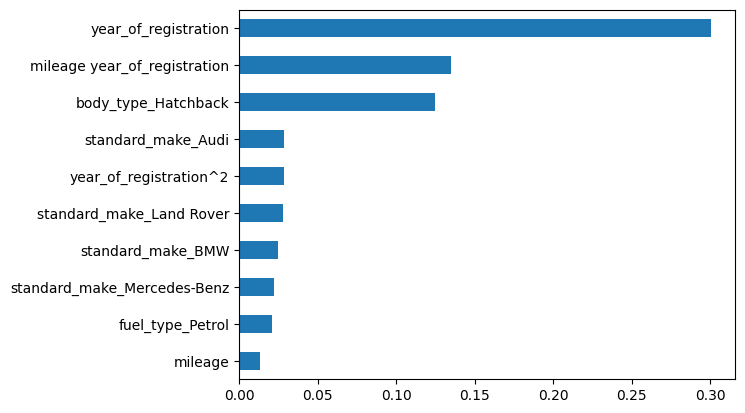

In [129]:
#plotting the feature importance and impact on the model
def plot_regressor_feat_imp_barh(rf, feat_names, ax=None, top_feat_k=10, style_kws={}):
    """ """
    if ax is None:
        fig, ax = plt.subplots()
    
    return pd.Series(
        rf.feature_importances_, 
        index=feat_names
    ).sort_values().tail(top_feat_k).plot.barh(**style_kws)

plot_regressor_feat_imp_barh(
    regressor_pipe['regressor_model'] , 
    regressor_pipe['preprocessor'].get_feature_names_out()
);

**Hyperparameter Tuning - with GridSearch CV: Random Forest Regressor**

In [ ]:
#setting up the parameters for grid search
rfr_params = {
    'regressor_model__n_estimators': [100, 200, 300],
    'regressor_model__max_depth': [5, 10],
}


In [ ]:
#setting up the grid search
rfr_grid = GridSearchCV(regressor_pipe, 
                    param_grid = rfr_params, 
                    cv=5)

In [ ]:
rfr_grid.fit(X_train, y_train) 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('simple_imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler()),
                                                                                         ('poly_int',
                                                                                          PolynomialFeatures(include_bias=False))]),
                                                                         ['mileage',
                                                                          'year_of_registration',
                                                                          'miles_per_year']),
                                                                        ('cat',
                                                                         Pipeline(steps=[(...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='if_binary',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['standard_make',
                                                                          'standard_model',
                                                                          'vehicle_condition',
                                                                          'body_type',
                                                                          'fuel_type'])],
                                                          verbose_feature_names_out=False)),
                                       ('regressor_model',
                                        RandomForestRegressor())]),
             param_grid={'regressor_model__max_depth': [5, 10],
                         'regressor_model__n_estimators': [100, 200, 300]})

In [ ]:
rfr_grid.score(X_test, y_test) #scoring the gridsearch with random forest on the training data

0.7943919448745931

In [ ]:
# Get the best hyperparameters and score
print(f'Best Hyperparameters: {rfr_grid.best_params_}')
print(f'Best Score: {rfr_grid.best_score_}')

Best Hyperparameters: {'regressor_model__max_depth': 10, 'regressor_model__n_estimators': 200}
Best Score: 0.7986473705275849


In [ ]:
#setting the best estimator for the gridsearcv for random forest model
best_rfr_grid = rfr_grid.best_estimator_ 
#scores = cross_val_score(best_estimator, X, y, cv=5, scoring='neg_mean_squared_error')
rfr_grid_accuracy = cross_val_score(best_rfr_grid, X, y, cv=5, scoring='neg_mean_squared_error')

In [ ]:
rfr_grid_accuracy #random forest gridsearch accuracy

array([-13519281.08260974, -12972205.16512326, -13931704.46436054,
       -13667349.75817824, -13398957.71411214])

In [ ]:
print("Mean of negative mean squared error scores: ", rfr_grid_accuracy.mean())
print("Standard deviation of negative mean squared error scores: ", rfr_grid_accuracy.std())

Mean of negative mean squared error scores:  -13497899.636876786
Standard deviation of negative mean squared error scores:  317333.04898528865


## **3. Boosted Tree - Hist Gradient Boosting Regressor**

In [110]:
#building the hist gradient regressor
from sklearn.ensemble import HistGradientBoostingRegressor
hist_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor), 
        #('variance_selector', VarianceThreshold(threshold=0.01)), 
        #('feat_sel', SelectKBest(f_regression, k=10)), 
        #('reducer', PCA(n_components=5)),
        ('hgbr_model', HistGradientBoostingRegressor())
    ]
).set_output(transform='pandas')

In [111]:
hist_pipe.fit(X_train, y_train) #fitting the model on the training set

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('poly_int',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['mileage',
                                                   'year_of_registration',
                                                   'miles_per_year']),
                                                 ('cat',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['standard_make',
                                                   'standard_model',
                                                   'vehicle_condition',
                                                   'body_type', 'fuel_type'])],
                                   verbose_feature_names_out=False)),
                ('hgbr_model', HistGradientBoostingRegressor())])

**3b. Evaluation of Hist Gradient Boosting Regressor**

In [112]:
hist_pipe.score(X_test, y_test) #scoring the hist gradient model

0.866322427639255

In [113]:
rmse(y_test, hist_pipe.predict(X_test)) #root mean square error of the hist gradient model

3046.1884303642687

**Hyperparameter Tuning - with GridSearch CV: Hist Gradient Boosting Regressor**

In [ ]:
#setting parameters for hyperparameter
hist_params = { 
    'hgbr_model__learning_rate': [0.01, 0.1, 0.5],
    #'hgbr_model__max_iter': [100, 200, 500],
}

In [ ]:
hist_grid = GridSearchCV(hist_pipe, 
                    param_grid = hist_params, 
                    cv=5)

In [ ]:
hist_grid.fit(X_train, y_train) #fitting the hist gradient gridsearch on the train data

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('simple_imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler()),
                                                                                         ('poly_int',
                                                                                          PolynomialFeatures(include_bias=False))]),
                                                                         ['mileage',
                                                                          'year_of_registration',
                                                                          'miles_per_year']),
                                                                        ('cat',
                                                                         Pipeline(steps=[(...r',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='if_binary',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['standard_make',
                                                                          'standard_model',
                                                                          'vehicle_condition',
                                                                          'body_type',
                                                                          'fuel_type'])],
                                                          verbose_feature_names_out=False)),
                                       ('hgbr_model',
                                        HistGradientBoostingRegressor())]),
             param_grid={'hgbr_model__learning_rate': [0.01, 0.1, 0.5]})

In [ ]:
hist_grid.score(X_test, y_test) #the score for hist grradient affter grid search

0.8654215370237175

In [ ]:
# Get the best hyperparameters and score
print(f'Best Hyperparameters: {hist_grid.best_params_}')
print(f'Best Score: {hist_grid.best_score_}')

Best Hyperparameters: {'hgbr_model__learning_rate': 0.1}
Best Score: 0.865151922985412


## **4. Stacker Ensemble**

In [114]:
#building the stacking regresssor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LassoCV

estimators = [
    ("lr_model", linear_pipe),
    ("rfr_model", regressor_pipe),
    ("hgbr", hist_pipe),
]

stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=LassoCV())

In [115]:
stacking_regressor.fit(X_train, y_train) #fitting the model on the data

StackingRegressor(estimators=[('lr_model',
                               Pipeline(steps=[('preprocessor',
                                                ColumnTransformer(remainder='passthrough',
                                                                  transformers=[('num',
                                                                                 Pipeline(steps=[('simple_imputer',
                                                                                                  SimpleImputer(strategy='median')),
                                                                                                 ('scaler',
                                                                                                  StandardScaler()),
                                                                                                 ('poly_int',
                                                                                                  PolynomialFeatures(include_bias=False))]),
                                                                                 ['mileage',
                                                                                  'year_of_registration',
                                                                                  'miles_per_year']),
                                                                                ('cat',
                                                                                 Pip...
                                                                                 Pipeline(steps=[('simple_imputer',
                                                                                                  SimpleImputer(strategy='most_frequent')),
                                                                                                 ('ohe',
                                                                                                  OneHotEncoder(drop='if_binary',
                                                                                                                handle_unknown='ignore',
                                                                                                                sparse_output=False))]),
                                                                                 ['standard_make',
                                                                                  'standard_model',
                                                                                  'vehicle_condition',
                                                                                  'body_type',
                                                                                  'fuel_type'])],
                                                                  verbose_feature_names_out=False)),
                                               ('hgbr_model',
                                                HistGradientBoostingRegressor())]))],
                  final_estimator=LassoCV())

In [116]:
stacking_regressor.score(X_test, y_test) #stacking regressor score

0.8798874546597348

In [117]:
rmse(y_test, stacking_regressor.predict(X_test)) #rmse score of the stacking regressor 

2887.497882912966

# **Model Evaluation and Analysis**

**Cross validation score of the Elatic Net (Linear) Model**


In [ ]:
#cross validation score of the model
linear_cvs = cross_val_score(linear_pipe, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
print(linear_cvs.mean()*-1, linear_cvs.std())

4484.014337281801 124.78937383014204


**Cross validation score of the Elatic Net (Linear) Model - GrisdSearchCV**

In [ ]:
#cross validation score of the model

lineargrid_cvs = cross_val_score(linear_grid, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
print(lineargrid_cvs.mean()*-1, lineargrid_cvs.std())

3871.8480993106214 116.7328919972323


**Cross validation score of the Random Forest Regressor Model**












In [ ]:
#cross validation score of the model

rfr_cvs = cross_val_score(regressor_pipe, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
print(rfr_cvs.mean()*-1, rfr_cvs.std())

2992.171985385829 90.81812481643313


**Cross validation score of the Random Forest Regressor Model - GrisdSearchCV**



In [ ]:
#cross validation score of the model

rfrgrid_cvs = cross_val_score(rfr_grid, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
print(rfrgrid_cvs.mean()*-1, rfrgrid_cvs.std())

3689.7683259926403 116.84230583578685


**Cross validation score of the Hist Gradient Boosting Regressor Model**


In [ ]:
#cross validation score of the model

hist_cvs = cross_val_score(hist_pipe, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
print(hist_cvs.mean()*-1, hist_cvs.std())

3018.473781179959 101.025892136489


**Cross validation score of the Hist Gradient Boosting Regressor Model - GrisdSearchCV**

In [ ]:
#cross validation score of the model

histgrid_cvs = cross_val_score(hist_grid, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
print(histgrid_cvs.mean()*-1, histgrid_cvs.std())

3011.5193252339386 103.51973125701645



**Overall performances with Cross-Validation**

**Cross validation score of the Stacking Regressor Model**












In [ ]:
#cross validation score of the model

stacking_cvs = cross_val_score(stacking_regressor, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
print(stacking_cvs.mean()*-1, stacking_cvs.std())

2858.5543849618925 103.87799967340902


**Cross validation score of the Stacking Regressor Model - GrisdSearchCV**



In [ ]:
#cross validation score of the model
s
tackgrid_cvs = cross_val_score(stack_grid, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
print(stackgrid_cvs.mean()*1, rfrgrid_cvs.std())

a quick visualisation and analysis of all models used

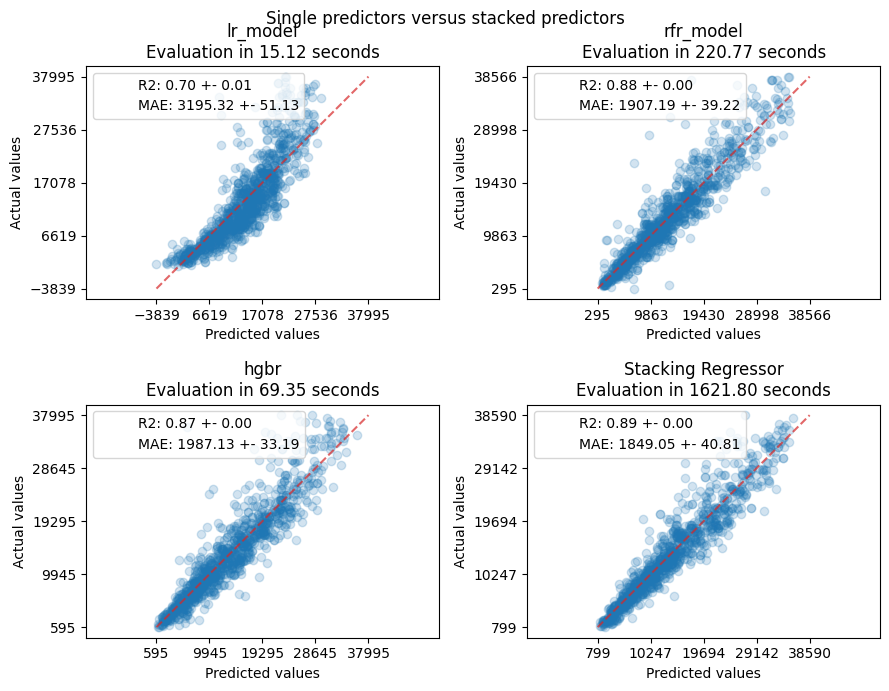

In [118]:
#plotting the score of all models togehter
import time
import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay
from sklearn.model_selection import cross_validate, cross_val_predict

fig, axs = plt.subplots(2, 2, figsize=(9, 7))
axs = np.ravel(axs)

for ax, (name, est) in zip(
    axs, estimators + [("Stacking Regressor", stacking_regressor)]
):
    scorers = {"R2": "r2", "MAE": "neg_mean_absolute_error"}

    start_time = time.time()
    scores = cross_validate(
        est, X, y, scoring=list(scorers.values()), n_jobs=-1, verbose=0
    )
    elapsed_time = time.time() - start_time

    y_pred = cross_val_predict(est, X, y, n_jobs=-1, verbose=0)
    scores = {
        key: (
            f"{np.abs(np.mean(scores[f'test_{value}'])):.2f} +- "
            f"{np.std(scores[f'test_{value}']):.2f}"
        )
        for key, value in scorers.items()
    }

    display = PredictionErrorDisplay.from_predictions(
        y_true=y,
        y_pred=y_pred,
        kind="actual_vs_predicted",
        ax=ax,
        scatter_kwargs={"alpha": 0.2, "color": "tab:blue"},
        line_kwargs={"color": "tab:red"},
    )
    ax.set_title(f"{name}\nEvaluation in {elapsed_time:.2f} seconds")

    for name, score in scores.items():
        ax.plot([], [], " ", label=f"{name}: {score}")
    ax.legend(loc="upper left")

plt.suptitle("Single predictors versus stacked predictors")
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

**True vs Predicted Analysis**

In [ ]:
#setting a function to plot true values against the predicted values from the model
def plot_true_vs_predicted(
        est, 
        X_train, y_train,
        X_test, y_test,
        ax=None,
        train_style_kws={},
        test_style_kws={}
    ):
    if ax is None:
        fig, ax = plt.subplots()
    y_pred_train = est.predict(X_train)
    y_pred_test = est.predict(X_test)
    ax.plot(y_train, y_pred_train, '.', label='train', **train_style_kws)
    ax.plot(y_test, y_pred_test, '.', label='test', **test_style_kws)
    ax.set_xlabel('True Target')
    ax.set_ylabel('Predicted Target')
    # the diagnonal line for the idealised space of predictions
    ax.plot(
        [0, 1], [0, 1], transform=ax.transAxes, 
        color='gray', linestyle=':', alpha=0.3
    )
    ax.legend()

    return ax

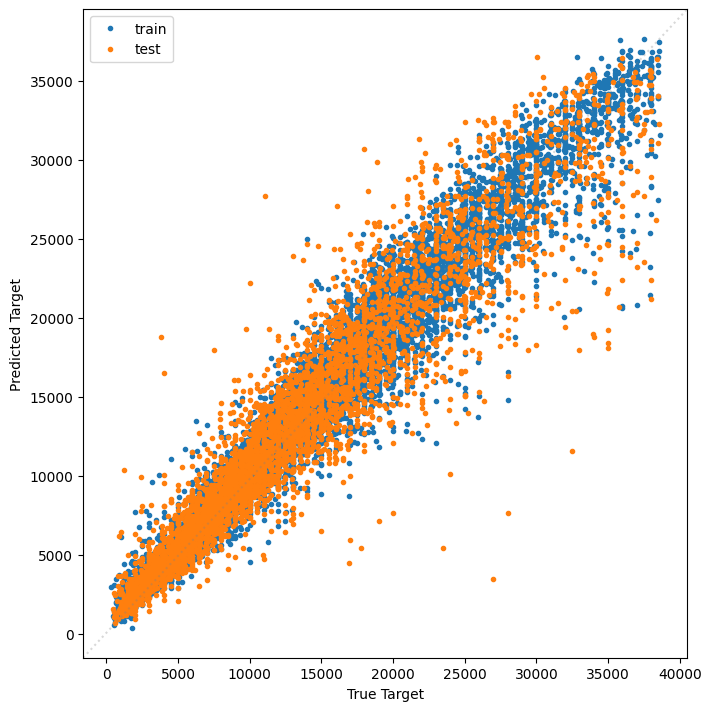

In [ ]:
#using the stacking regressor as it scores higher compare to other models
fig, ax = plt.subplots(figsize=(7,7), constrained_layout=True)
plot_true_vs_predicted(
    stacking_regressor,
    X_train, y_train,
    X_test, y_test, 
    ax=ax
);

**Global and Local Explanation with SHAP**

In [123]:
!pip install -q shap
import shap
shap.initjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 13.1 MB/s eta 0:00:00


<function shap.plots._force.initjs()>

In [124]:
X_test_transformed = regressor_pipe['preprocessor'].transform(X_test) #transforming the testing data

In [125]:
X_test_transformed100 = shap.utils.sample(X_test_transformed, 100) # 100 instances for use as the background distribution

In [126]:
explainer = shap.Explainer(regressor_pipe['regressor_model'].predict, X_test_transformed100)
shap_values = explainer(X_test_transformed)

Permutation explainer: 4495it [42:19,  1.77it/s]


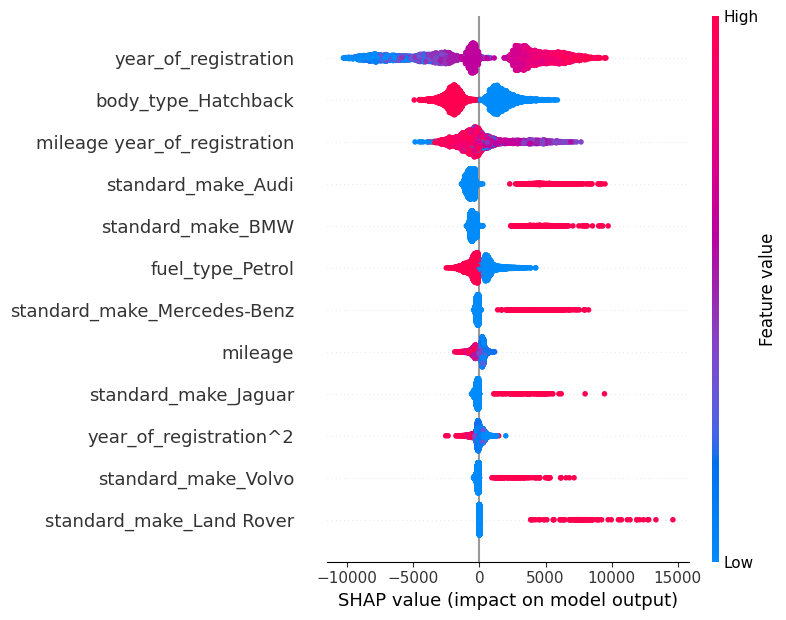

In [128]:
#the global explanation of feature contributions to the model
shap.summary_plot(shap_values, X_test_transformed, max_display=12)

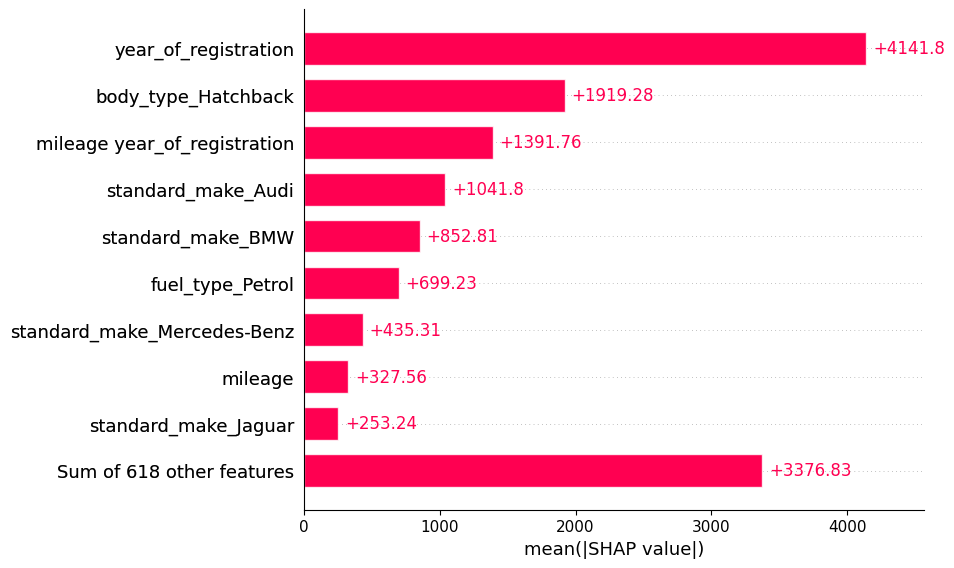

In [ ]:
shap.plots.bar(shap_values.abs.mean(0)) #global explanation using bar graph of the summary of feature importance

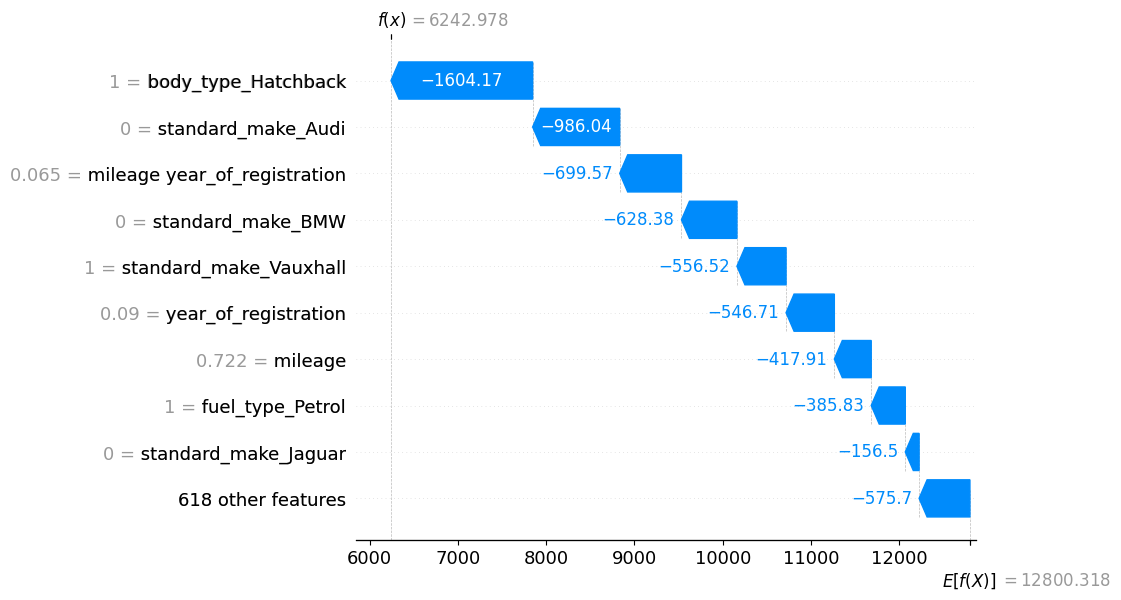

In [ ]:
#global explanation of the features impact
shap.plots.waterfall(shap_values[0])

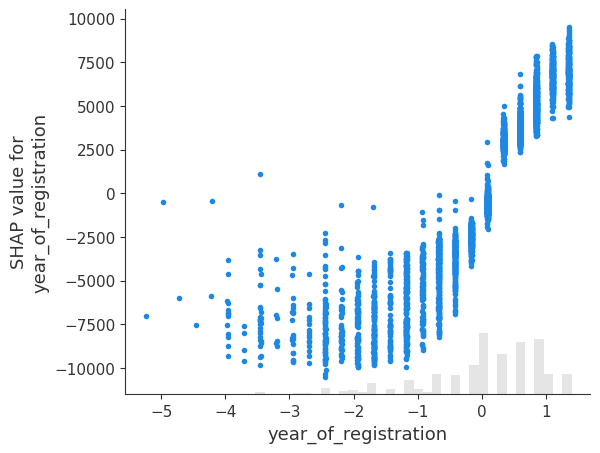

In [ ]:
#local explanation of year of registration column
shap.plots.scatter(shap_values[:,"year_of_registration"])

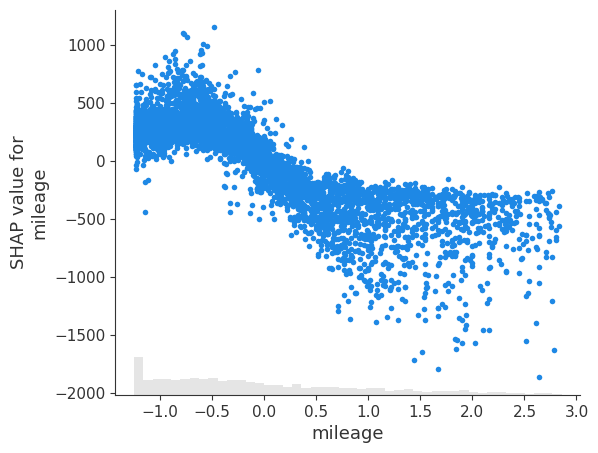

In [136]:
#local explanation of year of registration column
shap.plots.scatter(shap_values[:,"mileage"])

**Partial Dependecy Plots**

In [120]:
from sklearn.inspection import PartialDependenceDisplay

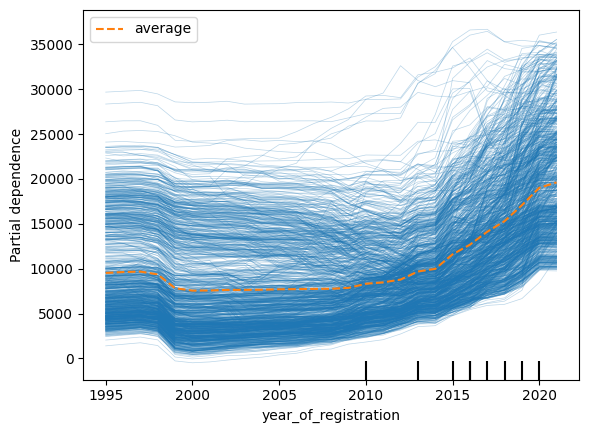

In [ ]:
#visualising the average and value of partial dependency of year of registration to the target
PartialDependenceDisplay.from_estimator(stacking_regressor, X_test, features=['year_of_registration'], kind='both')

KeyboardInterrupt: ignored

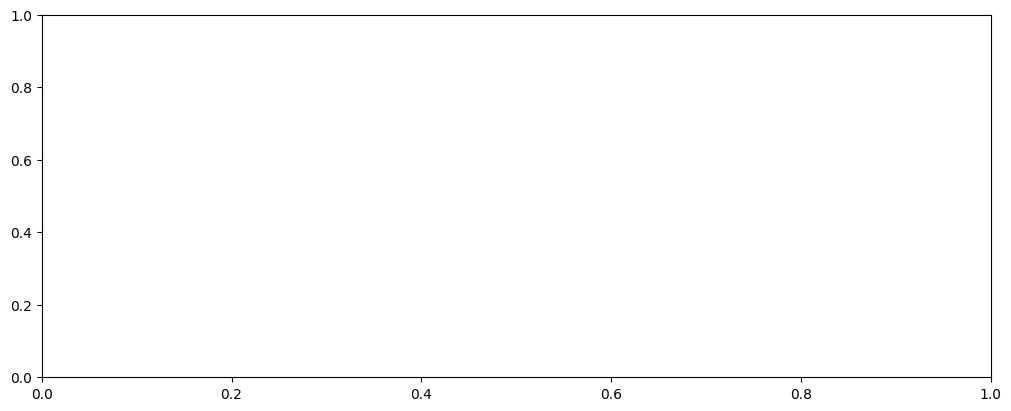

In [121]:
fig, ax =plt.subplots(figsize=(10,4), constrained_layout = True)
PartialDependenceDisplay.from_estimator(
    stacking_regressor, X_test, features=['year_of_registration', 'mileage', ('year_of_registration', 'mileage')], kind='average',
    grid_resolution=30, n_jobs=2, random_state=0, ax=ax, n_cols=3, subsample=20
)

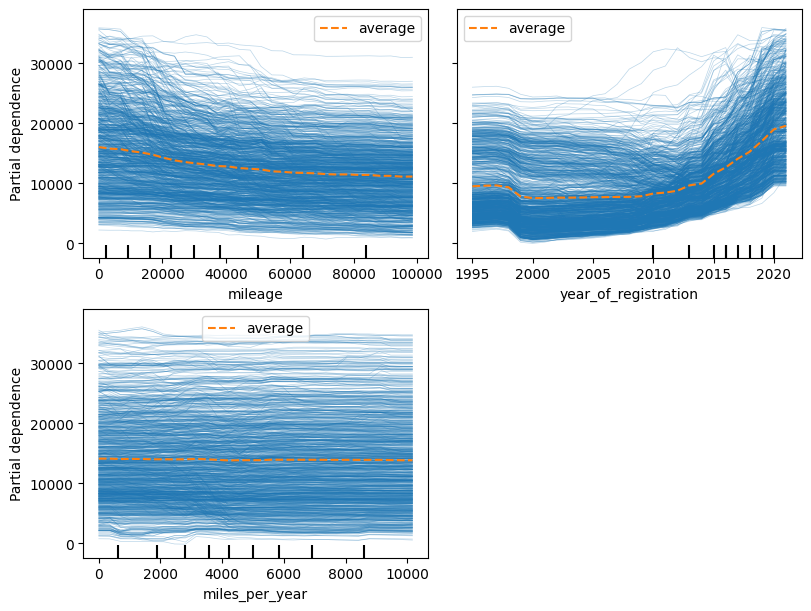

In [ ]:
fig, ax =plt.subplots(figsize=(8,6), constrained_layout = True)
PartialDependenceDisplay.from_estimator(
    stacking_regressor, X_test, features=X_test.select_dtypes(exclude='object').columns, kind='both',
    grid_resolution=30, n_jobs=2, random_state=0, ax=ax, n_cols=2
)

Computing partial dependence plots...


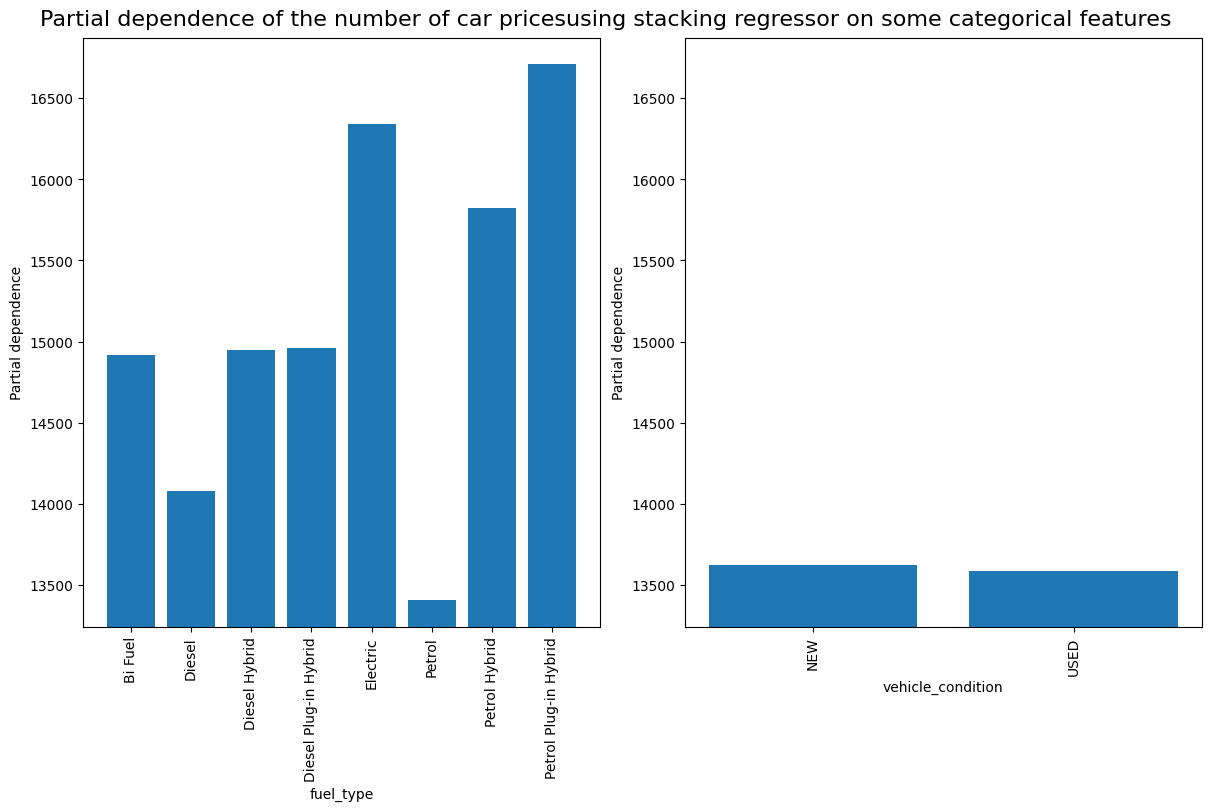

In [ ]:
#plotting PDP on categorical features
features_info={
    'features': ['fuel_type', 'vehicle_condition'], 'kind':'average', 'categorical_features': categorical_features
}
common_params = {
    'subsample': 50, 'n_jobs':2, 'grid_resolution':20, 'random_state':0
}
print("Computing partial dependence plots...")

_, ax = plt.subplots(ncols=2,  figsize=(12, 8), constrained_layout=True)
display = PartialDependenceDisplay.from_estimator(
    stacking_regressor,
    X_train,
    **features_info,
    ax=ax,
    **common_params,
)
_ = display.figure_.suptitle(
    "Partial dependence of the number of car prices "
    "using stacking regressor on some categorical features",
    fontsize=16,
)